# 라이브러리 실행

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 전체 경로를 리스트로 불러오기
evapp_list = sorted(glob("/content/drive/MyDrive/ev_app/*.csv"))
evapp_list

['/content/drive/MyDrive/ev_app/1.ev_app_resident.csv',
 '/content/drive/MyDrive/ev_app/2.ev_app_activity.csv',
 '/content/drive/MyDrive/ev_app/3.ev_app_activity_resident.csv']

In [ ]:
# 해당하는 리스트 인덱스로 특정 csv 파일 불러오기
ev_app_resi = pd.read_csv(evapp_list[0])
ev_app_acti = pd.read_csv(evapp_list[1])
ev_app_acti_resi = pd.read_csv(evapp_list[2])

In [ ]:
print(ev_app_resi.head())
print(ev_app_acti.head())
print(ev_app_acti_resi.head())

    base_dt  dow  ccw_cd ccw_nm   adng_cd adng_nm   cell_id  cell_xcrd  \
0  20220605    7    4146    용인시  41463572    동백1동  86135034  127.15225   
1  20220625    6    4146    용인시  41465580    상현2동  84375196  127.09008   
2  20220614    2    4146    용인시  41461250     포곡읍  87958893  127.21660   
3  20220619    7    4146    용인시  41465530     신봉동  84119243  127.08097   
4  20220624    5    4146    용인시  41465580    상현2동  84423187  127.09178   

   cell_ycrd  gender  age app_web  time_zone  count_cust  
0  37.286300    MALE    6   EV라운지          5       3.522  
1  37.309536    MALE    8  파워큐브차저          2       4.231  
2  37.274303  FEMALE   14   EV라운지          1      18.440  
3  37.323480    MALE   13   EV라운지          2       4.335  
4  37.306840    MALE    8   EV라운지          4       4.231  
    base_dt  dow  ccw_cd ccw_nm   adng_cd adng_nm   cell_id   cell_xcrd  \
0  20220614    2    4146    용인시  41461256     이동읍  87958702  127.216920   
1  20220613    1    4146    용인시  41463570     마북동  

In [ ]:
# 시리즈를 데이터프레임으로 변환
ev_app_resi = pd.DataFrame(ev_app_resi)
ev_app_acti = pd.DataFrame(ev_app_acti)
ev_app_acti_resi = pd.DataFrame(ev_app_acti_resi)
print(ev_app_resi.info())
print(ev_app_acti.info())
print(ev_app_acti_resi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292043 entries, 0 to 292042
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   base_dt     292043 non-null  int64  
 1   dow         292043 non-null  int64  
 2   ccw_cd      292043 non-null  int64  
 3   ccw_nm      292043 non-null  object 
 4   adng_cd     292043 non-null  int64  
 5   adng_nm     292043 non-null  object 
 6   cell_id     292043 non-null  int64  
 7   cell_xcrd   292043 non-null  float64
 8   cell_ycrd   292043 non-null  float64
 9   gender      292043 non-null  object 
 10  age         292043 non-null  int64  
 11  app_web     292043 non-null  object 
 12  time_zone   292043 non-null  int64  
 13  count_cust  292043 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 31.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264713 entries, 0 to 264712
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtyp

In [ ]:
# 용인시 거주자 타지역 데이터에서 용인시 데이터만 주출
ev_app_acti_resi = ev_app_acti_resi.loc[ev_app_acti_resi['ccw_nm'] == "용인시"]
print(ev_app_acti_resi.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192557 entries, 0 to 293170
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   base_dt     192557 non-null  int64  
 1   dow         192557 non-null  int64  
 2   mega_cd     192557 non-null  int64  
 3   mega_nm     192557 non-null  object 
 4   ccw_cd      192557 non-null  int64  
 5   ccw_nm      192557 non-null  object 
 6   adng_cd     192557 non-null  int64  
 7   adng_nm     192557 non-null  object 
 8   cell_id     192557 non-null  int64  
 9   cell_xcrd   192557 non-null  float64
 10  cell_ycrd   192557 non-null  float64
 11  gender      192557 non-null  object 
 12  age         192557 non-null  int64  
 13  app_web     192557 non-null  object 
 14  time_zone   192557 non-null  int64  
 15  count_cust  192557 non-null  float64
dtypes: float64(3), int64(8), object(5)
memory usage: 25.0+ MB
None


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# 한글 폰트 깨짐 현상 해결을 위한 나눔 폰트 설치
# 코드 1회 실행 후 주석 처리하고 런타임 재시작 및 모두 실행
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# K-평균 알고리즘 모델

## 구갈동

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# 출처: https://needjarvis.tistory.com/719 [자비스가 필요해:티스토리]

In [ ]:
all_ev_app = pd.concat([ev_app_resi, ev_app_acti, ev_app_acti_resi])
all_ev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749313 entries, 0 to 293170
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   base_dt     749313 non-null  int64  
 1   dow         749313 non-null  int64  
 2   ccw_cd      749313 non-null  int64  
 3   ccw_nm      749313 non-null  object 
 4   adng_cd     749313 non-null  int64  
 5   adng_nm     749313 non-null  object 
 6   cell_id     749313 non-null  int64  
 7   cell_xcrd   749313 non-null  float64
 8   cell_ycrd   749313 non-null  float64
 9   gender      749313 non-null  object 
 10  age         749313 non-null  int64  
 11  app_web     749313 non-null  object 
 12  time_zone   749313 non-null  int64  
 13  count_cust  749313 non-null  float64
 14  mega_cd     192557 non-null  float64
 15  mega_nm     192557 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 97.2+ MB


In [ ]:
# 'mega_cd','mega_nm' 컬럼 드랍하기
all_ev_app = all_ev_app.drop(['mega_cd','mega_nm'], axis = 1)
all_ev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749313 entries, 0 to 293170
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   base_dt     749313 non-null  int64  
 1   dow         749313 non-null  int64  
 2   ccw_cd      749313 non-null  int64  
 3   ccw_nm      749313 non-null  object 
 4   adng_cd     749313 non-null  int64  
 5   adng_nm     749313 non-null  object 
 6   cell_id     749313 non-null  int64  
 7   cell_xcrd   749313 non-null  float64
 8   cell_ycrd   749313 non-null  float64
 9   gender      749313 non-null  object 
 10  age         749313 non-null  int64  
 11  app_web     749313 non-null  object 
 12  time_zone   749313 non-null  int64  
 13  count_cust  749313 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 85.8+ MB


In [ ]:
resi_adng_name = ev_app_resi['adng_nm']                           # adng_nm 컬럼을 리스트로 추출
resi_adng_name_val = resi_adng_name.values                        # 리스트의 값 정의
resi_adng_name_list = list(dict.fromkeys(resi_adng_name_val))
resi_adng_name_list = sorted(resi_adng_name_list)                 # 리스트를 ㄱ,ㄴ,ㄷ 순으로 정렬
print(len(resi_adng_name_list))
print(resi_adng_name_list)

35
['구갈동', '구성동', '기흥동', '남사읍', '동백1동', '동백2동', '동백3동', '동부동', '동천동', '마북동', '모현읍', '백암면', '보라동', '보정동', '상갈동', '상하동', '상현1동', '상현2동', '서농동', '성복동', '신갈동', '신봉동', '양지면', '역삼동', '영덕1동', '영덕2동', '원삼면', '유림동', '이동읍', '죽전1동', '죽전2동', '중앙동', '포곡읍', '풍덕천1동', '풍덕천2동']


In [ ]:
all_name_data = []
for i in range(0, 35):
  all_name_df = all_ev_app[all_ev_app['adng_nm'] == resi_adng_name_list[i]]
  all_name_data.append(all_name_df)

In [ ]:
all_data = []
for i in range(0, 35):
  all_array = np.array(all_name_data[i][['cell_xcrd', 'cell_ycrd']])
  all_data.append(all_array)

In [ ]:
# 인덱스 번호를 변경해가면서 k-평균 알고리즘 훈련하기
# n_clusters = '클러스터의 개수'
k_means_0 = KMeans(init = "k-means++", n_clusters=21, n_init=15, random_state = 42)
k_means_0.fit(all_data[0])

KMeans(n_clusters=21, n_init=15, random_state=42)

In [ ]:
# 라벨 설정
k_means_0_labels = k_means_0.labels_
print('k_means_0_labels : ', k_means_0_labels)

# 중심점 설정
k_means_0_cluster_centers = k_means_0.cluster_centers_
print('k_means_0_cluster_centers : ', k_means_0_cluster_centers)

k_means_0_labels :  [15  3  2 ... 14 12 11]
k_means_0_cluster_centers :  [[127.11840187  37.28031858]
 [127.12885116  37.27114644]
 [127.11823465  37.27383736]
 [127.11262911  37.279697  ]
 [127.12812249  37.27738713]
 [127.11097421  37.2756471 ]
 [127.12027835  37.27207695]
 [127.13061631  37.26912814]
 [127.1123739   37.28351256]
 [127.11714194  37.27759038]
 [127.12167839  37.27800284]
 [127.13098367  37.27846285]
 [127.11481671  37.27390716]
 [127.11444689  37.27744922]
 [127.12612787  37.27050476]
 [127.11477088  37.2815962 ]
 [127.1100953   37.27316318]
 [127.11008492  37.27848327]
 [127.12294335  37.27362078]
 [127.13024329  37.274236  ]
 [127.13280041  37.26999263]]


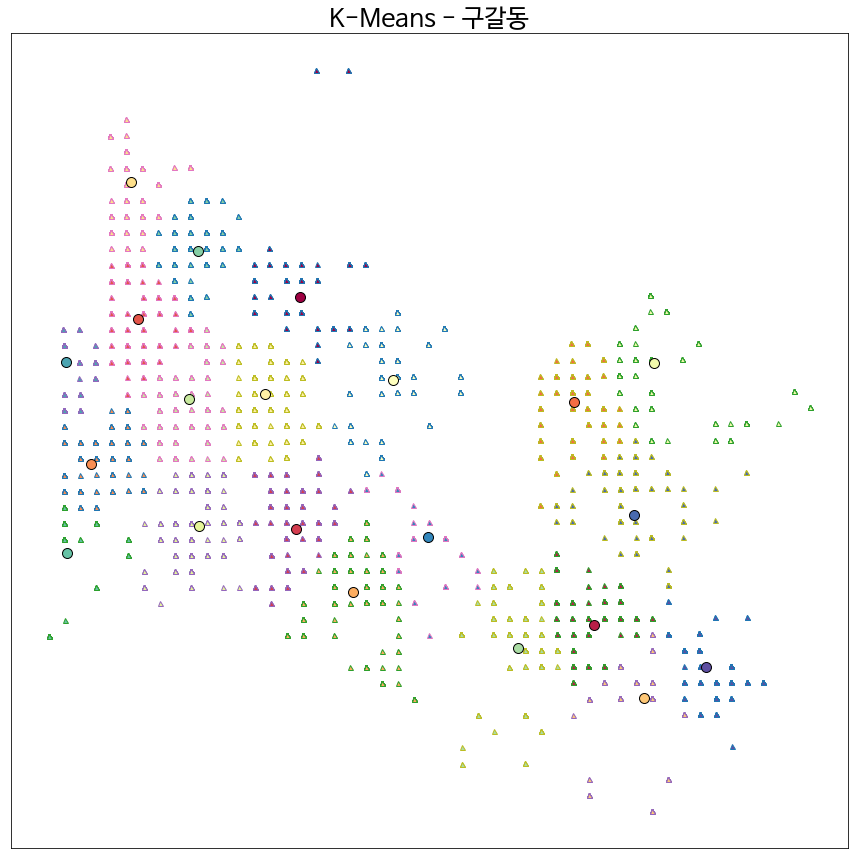

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_0_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(21), colors):
    my_members = (k_means_0_labels == k)

    # 중심 정의
    cluster_center = k_means_0_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[0][my_members, 0], all_data[0][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 구갈동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

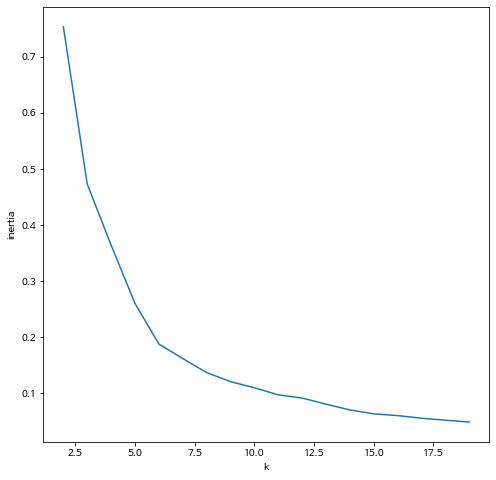

In [ ]:
# 반복문을 통해 알고리즘이 추천하는 최적의 k 값 찾기(엘보우)
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[0])
  inertia.append(km.inertia_)
plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 6

## 구성동

In [ ]:
k_means_1 = KMeans(init = "k-means++", n_clusters=15, n_init=12, random_state = 42)
k_means_1.fit(all_data[1])

KMeans(n_clusters=15, n_init=12, random_state=42)

In [ ]:
k_means_1_labels = k_means_1.labels_
print('k_means_1_labels : ', k_means_1_labels)

k_means_1_cluster_centers = k_means_1.cluster_centers_
print('k_means_1_cluster_centers : ', k_means_1_cluster_centers)

k_means_1_labels :  [ 6 11  4 ...  0  8  8]
k_means_1_cluster_centers :  [[127.12270056  37.29677469]
 [127.15230201  37.29612138]
 [127.14374368  37.28869612]
 [127.13110524  37.29056   ]
 [127.12209076  37.29388047]
 [127.12933706  37.29763749]
 [127.15086578  37.30008214]
 [127.14619896  37.29532509]
 [127.12602343  37.2929013 ]
 [127.15761761  37.30128155]
 [127.14798687  37.29135482]
 [127.13712037  37.29342749]
 [127.11740305  37.2940126 ]
 [127.15301383  37.29223981]
 [127.12190058  37.28924269]]


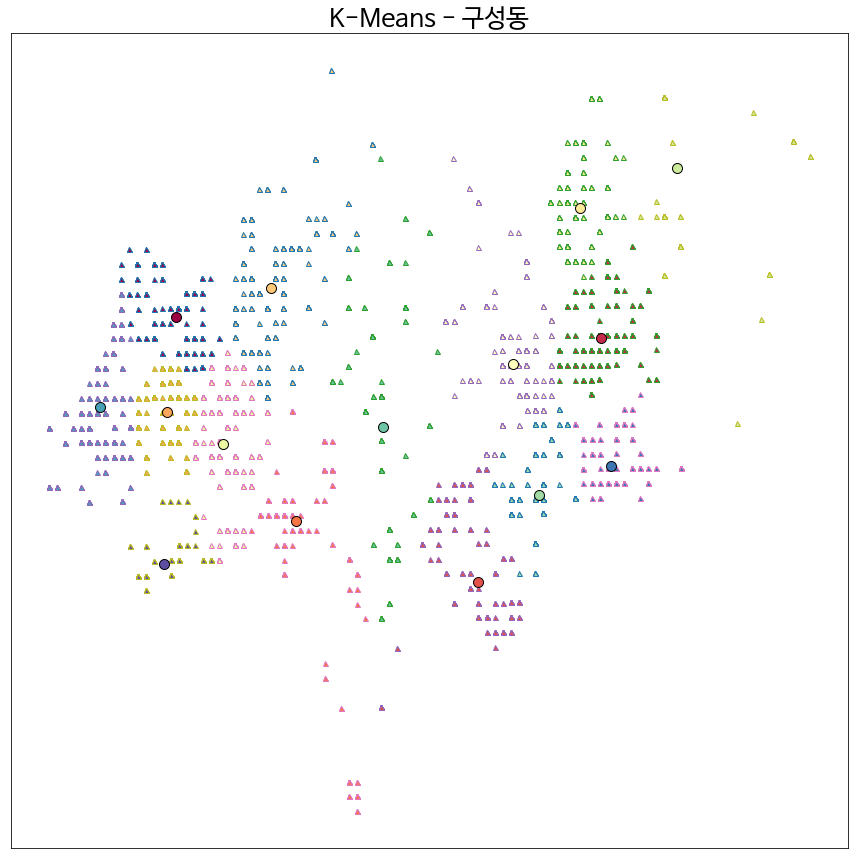

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_1_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(15), colors):
    my_members = (k_means_1_labels == k)

    # 중심 정의
    cluster_center = k_means_1_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[1][my_members, 0], all_data[1][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 구성동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

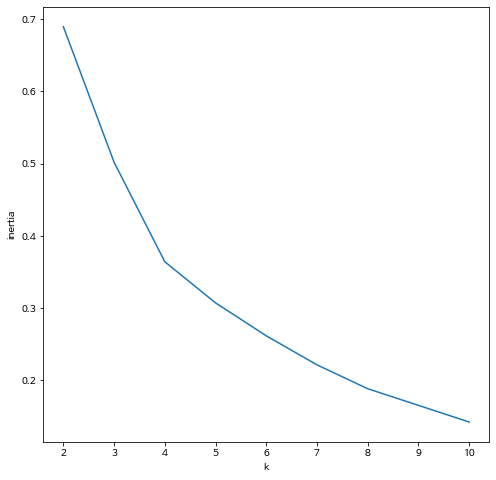

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[1])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4

## 기흥동

In [ ]:
k_means_2 = KMeans(init = "k-means++", n_clusters=15, n_init=12, random_state = 42)
k_means_2.fit(all_data[2])

KMeans(n_clusters=15, n_init=12, random_state=42)

In [ ]:
k_means_2_labels = k_means_2.labels_
print('k_means_2_labels : ', k_means_2_labels)

k_means_2_cluster_centers = k_means_2.cluster_centers_
print('k_means_2_cluster_centers : ', k_means_2_cluster_centers)

k_means_2_labels :  [ 6 10 11 ...  8  1  4]
k_means_2_cluster_centers :  [[127.114953    37.22209863]
 [127.10262088  37.24148707]
 [127.11762152  37.23620998]
 [127.0956818   37.220852  ]
 [127.13610122  37.21895953]
 [127.11354684  37.24194267]
 [127.1085828   37.23009067]
 [127.09090409  37.2300804 ]
 [127.1086533   37.24393264]
 [127.12116632  37.24286868]
 [127.11498274  37.23105661]
 [127.11190093  37.23723863]
 [127.10733961  37.23640707]
 [127.10594475  37.22359569]
 [127.12100868  37.22613519]]


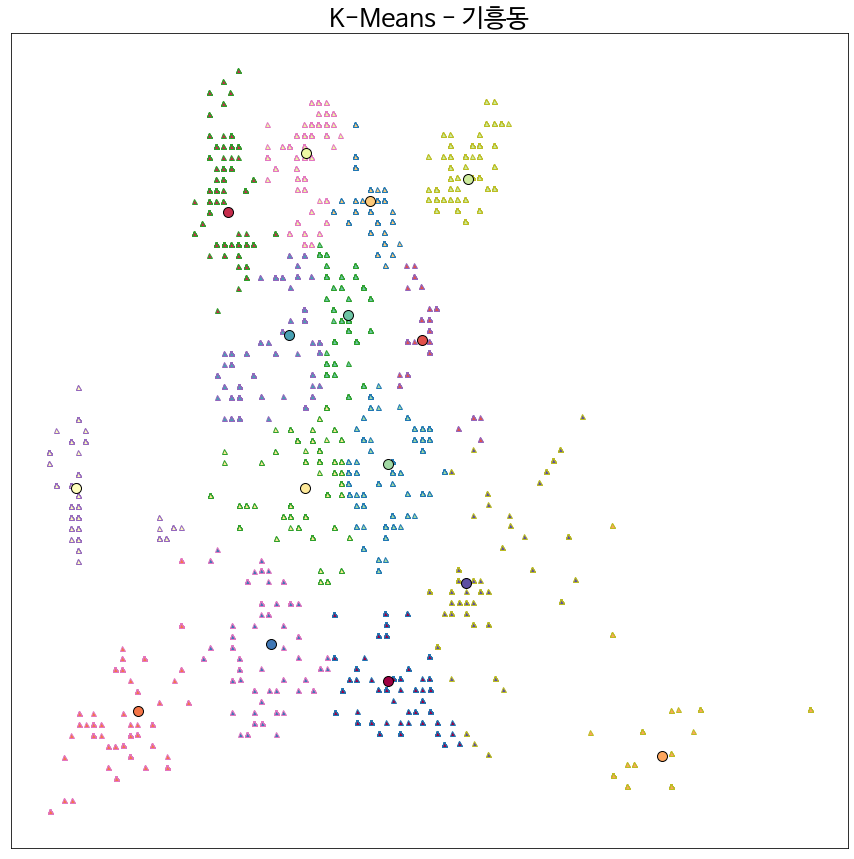

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_2_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(15), colors):
    my_members = (k_means_2_labels == k)

    # 중심 정의
    cluster_center = k_means_2_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[2][my_members, 0], all_data[2][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 기흥동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

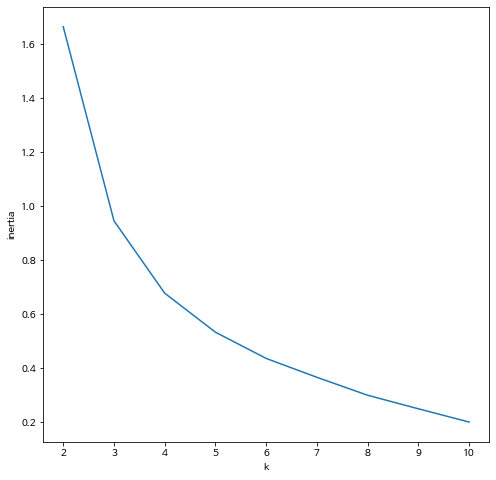

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[2])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 남사읍

In [ ]:
k_means_3 = KMeans(init = "k-means++", n_clusters=15, n_init=12, random_state = 42)
k_means_3.fit(all_data[3])

KMeans(n_clusters=15, n_init=12, random_state=42)

In [ ]:
k_means_3_labels = k_means_3.labels_
print('k_means_3_labels : ', k_means_3_labels)

k_means_3_cluster_centers = k_means_3.cluster_centers_
print('k_means_3_cluster_centers : ', k_means_3_cluster_centers)

k_means_3_labels :  [ 2  9 14 ...  1  5  2]
k_means_3_cluster_centers :  [[127.15884828  37.14122322]
 [127.14937981  37.09608401]
 [127.17129511  37.15585428]
 [127.1306492   37.15236182]
 [127.13805905  37.12719419]
 [127.17663722  37.15955555]
 [127.11589964  37.12001305]
 [127.18036988  37.13412413]
 [127.17326625  37.09156856]
 [127.17916677  37.17486015]
 [127.13855314  37.11021805]
 [127.145599    37.14580004]
 [127.15118846  37.11561896]
 [127.1265322   37.10241562]
 [127.13820589  37.16607779]]


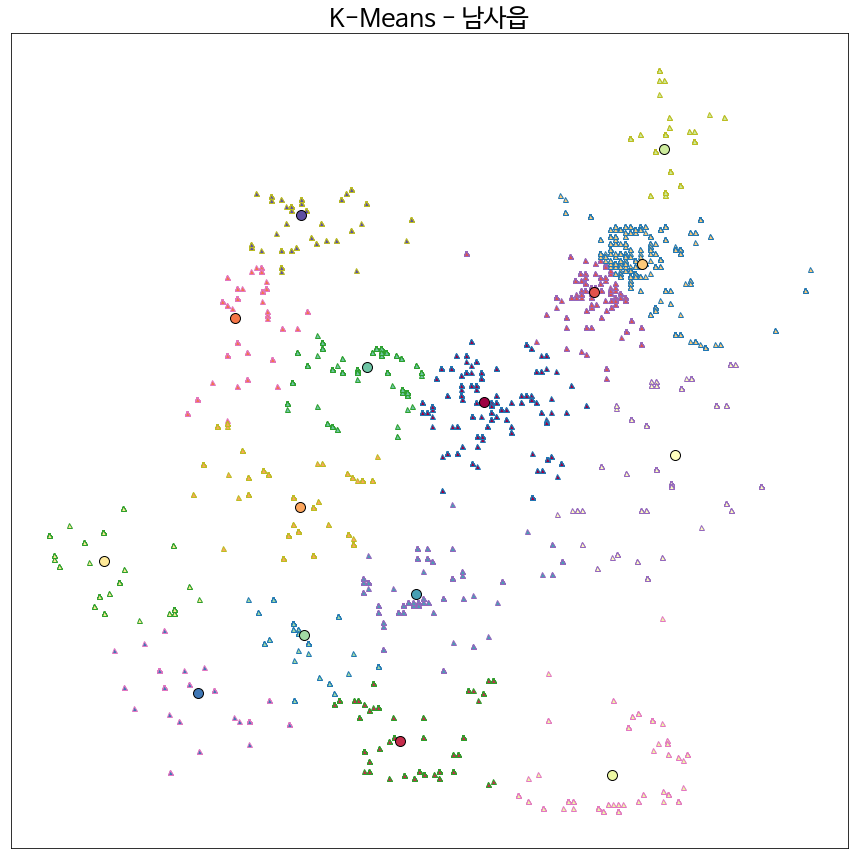

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_3_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(15), colors):
    my_members = (k_means_3_labels == k)

    # 중심 정의
    cluster_center = k_means_3_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[3][my_members, 0], all_data[3][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 남사읍', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

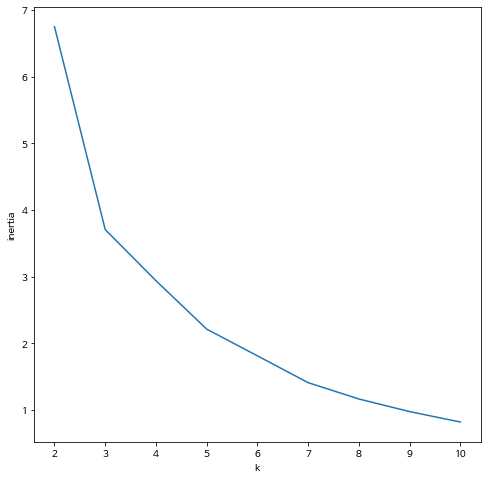

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[3])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 동백1동

In [ ]:
k_means_4 = KMeans(init = "k-means++", n_clusters=35, n_init=12, random_state = 42)
k_means_4.fit(all_data[4])

KMeans(n_clusters=35, n_init=12, random_state=42)

In [ ]:
k_means_4_labels = k_means_4.labels_
print('k_means_4_labels : ', k_means_4_labels)

k_means_4_cluster_centers = k_means_4.cluster_centers_
print('k_means_4_cluster_centers : ', k_means_4_cluster_centers)

k_means_4_labels :  [10 21 24 ... 12 10  6]
k_means_4_cluster_centers :  [[127.15452882  37.286826  ]
 [127.16291397  37.28464298]
 [127.155347    37.27973326]
 [127.15908318  37.28124319]
 [127.1660183   37.29412293]
 [127.16651849  37.28221487]
 [127.15454324  37.28406129]
 [127.1680935   37.28806682]
 [127.16320098  37.28162172]
 [127.16056936  37.28500629]
 [127.15168858  37.28686731]
 [127.15731072  37.28406675]
 [127.15918464  37.29044284]
 [127.17005225  37.28513714]
 [127.16185004  37.28093439]
 [127.1647505   37.28352994]
 [127.17323848  37.28175028]
 [127.16316599  37.27763771]
 [127.16354786  37.28967666]
 [127.15772152  37.28209575]
 [127.15467852  37.28208143]
 [127.15346507  37.27901769]
 [127.16687756  37.28608579]
 [127.15454889  37.28995231]
 [127.1607899   37.28294223]
 [127.16592171  37.28026514]
 [127.16693927  37.28332845]
 [127.16063104  37.28685439]
 [127.1587947   37.28403245]
 [127.1697134   37.29686096]
 [127.1529653   37.28416186]
 [127.16406261  37.2854032 ]

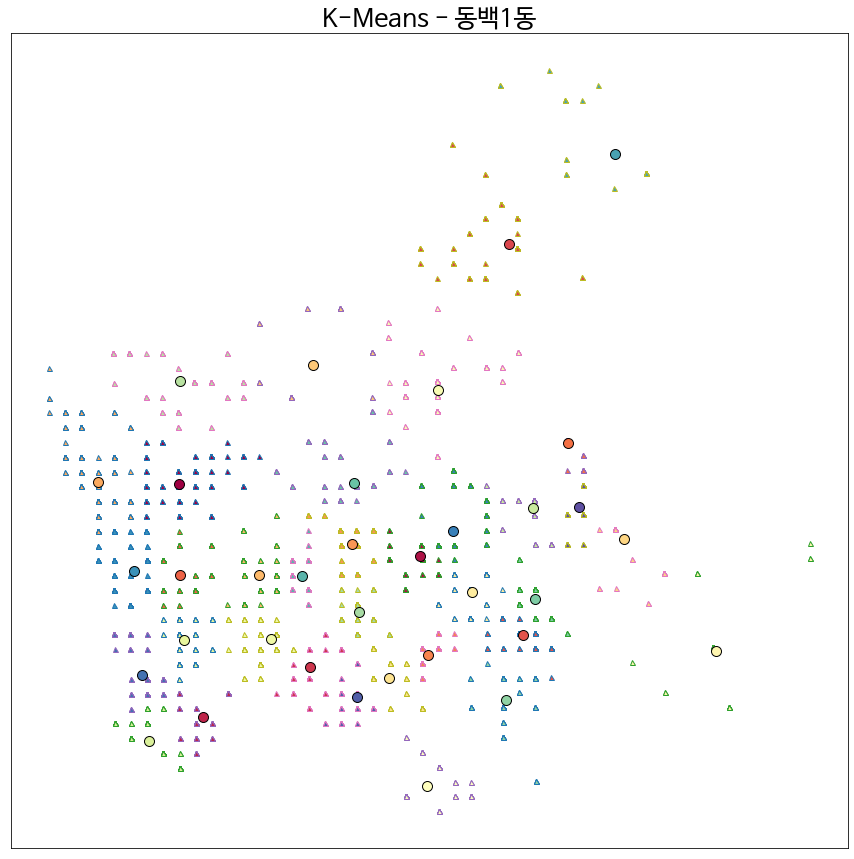

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_4_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(35), colors):
    my_members = (k_means_4_labels == k)

    # 중심 정의
    cluster_center = k_means_4_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[4][my_members, 0], all_data[4][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 동백1동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

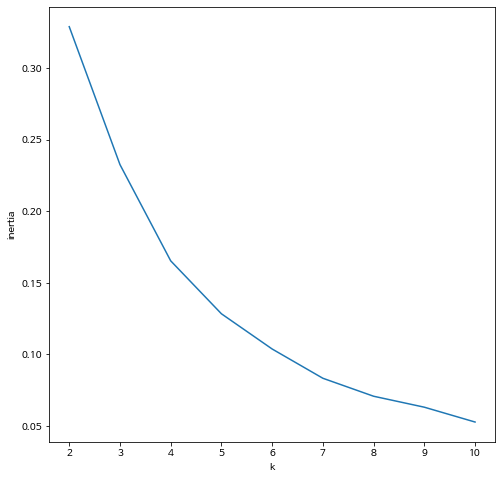

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[4])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4

## 동백2동

In [ ]:
k_means_5 = KMeans(init = "k-means++", n_clusters=32, n_init=12, random_state = 42)
k_means_5.fit(all_data[5])

KMeans(n_clusters=32, n_init=12, random_state=42)

In [ ]:
k_means_5_labels = k_means_5.labels_
print('k_means_5_labels : ', k_means_5_labels)

k_means_5_cluster_centers = k_means_5.cluster_centers_
print('k_means_5_cluster_centers : ', k_means_5_cluster_centers)

k_means_5_labels :  [ 9 19 16 ...  4  2 13]
k_means_5_cluster_centers :  [[127.16775415  37.25692116]
 [127.15427927  37.26990616]
 [127.15713433  37.27690876]
 [127.15420727  37.26381651]
 [127.16159377  37.25936418]
 [127.15272625  37.2761219 ]
 [127.16131416  37.27243396]
 [127.15601401  37.26653517]
 [127.15172216  37.27108835]
 [127.15736319  37.27949182]
 [127.16494215  37.26505778]
 [127.16191891  37.27623276]
 [127.15749626  37.26421681]
 [127.15343024  37.26496686]
 [127.15537326  37.27637899]
 [127.1662974   37.25703633]
 [127.15708797  37.26908809]
 [127.15853644  37.27515833]
 [127.15961887  37.27095729]
 [127.15459441  37.26802003]
 [127.15762189  37.27132558]
 [127.15012861  37.27414633]
 [127.15228958  37.26875318]
 [127.15946206  37.2627963 ]
 [127.14930304  37.2646118 ]
 [127.15228582  37.27808329]
 [127.15511672  37.27175687]
 [127.15290036  37.27045498]
 [127.16483471  37.25660654]
 [127.16028672  37.27580583]
 [127.16552411  37.26250662]
 [127.15552491  37.27465474]

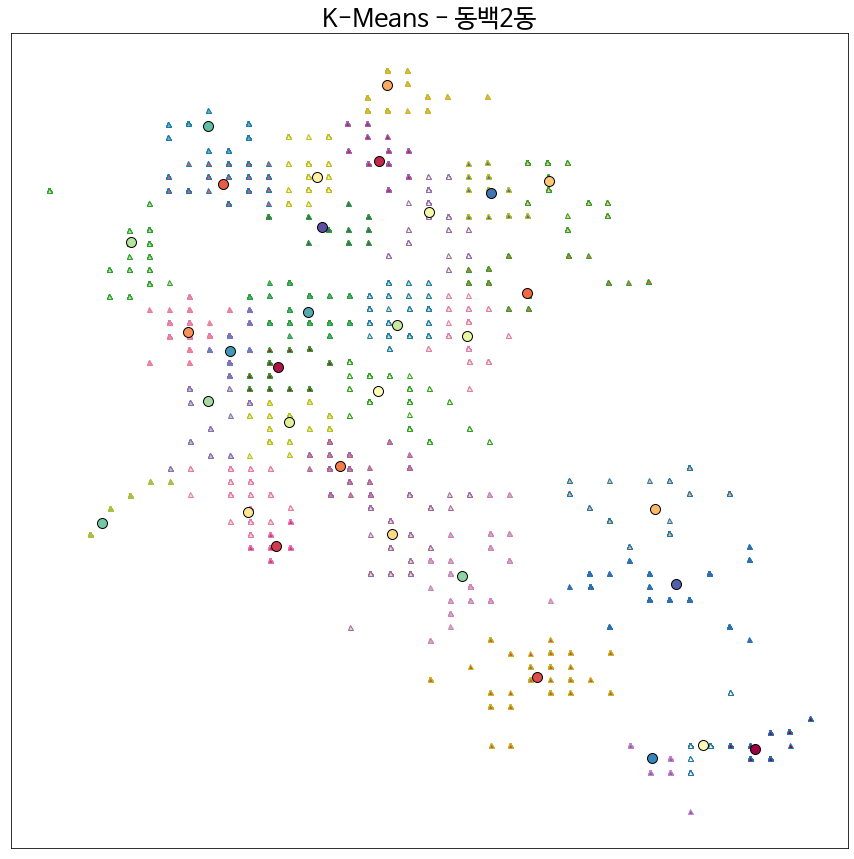

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_5_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(32), colors):
    my_members = (k_means_5_labels == k)

    # 중심 정의
    cluster_center = k_means_5_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[5][my_members, 0], all_data[5][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 동백2동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

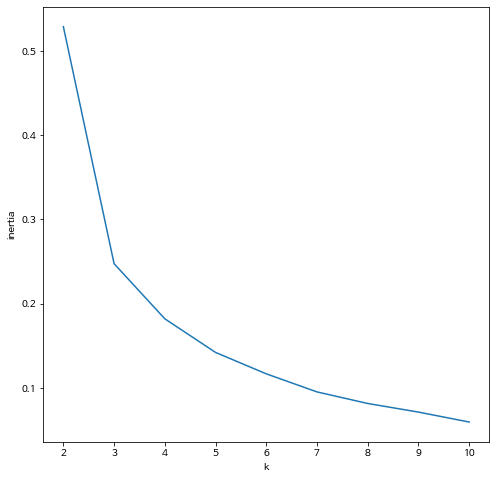

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[5])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 동백3동

In [ ]:
k_means_6 = KMeans(init = "k-means++", n_clusters=34, n_init=12, random_state = 42)
k_means_6.fit(all_data[6])

KMeans(n_clusters=34, n_init=12, random_state=42)

In [ ]:
k_means_6_labels = k_means_6.labels_
print('k_means_6_labels : ', k_means_6_labels)

k_means_6_cluster_centers = k_means_6.cluster_centers_
print('k_means_6_cluster_centers : ', k_means_6_cluster_centers)

k_means_6_labels :  [16  5 32 ...  9 13  5]
k_means_6_cluster_centers :  [[127.14713205  37.28096989]
 [127.14782     37.26871   ]
 [127.14318674  37.28102212]
 [127.14629186  37.28557968]
 [127.15051835  37.28349635]
 [127.14727567  37.27130457]
 [127.14526066  37.27873421]
 [127.14199943  37.2835743 ]
 [127.14777241  37.27856312]
 [127.1449287   37.283625  ]
 [127.15058873  37.26656517]
 [127.1446819   37.27105585]
 [127.14777448  37.2826715 ]
 [127.15115128  37.28049475]
 [127.14561597  37.27771942]
 [127.13941549  37.27965448]
 [127.14491653  37.27960134]
 [127.14794105  37.28449551]
 [127.14676158  37.27609411]
 [127.14366442  37.28398196]
 [127.14627207  37.28230609]
 [127.14895068  37.27981118]
 [127.14944482  37.26989693]
 [127.14357493  37.27741784]
 [127.14710288  37.2698471 ]
 [127.14503208  37.27577007]
 [127.14725282  37.27998671]
 [127.14896006  37.28310251]
 [127.14462743  37.28186792]
 [127.14995049  37.28457819]
 [127.1490972   37.28744082]
 [127.14851717  37.2655799 ]

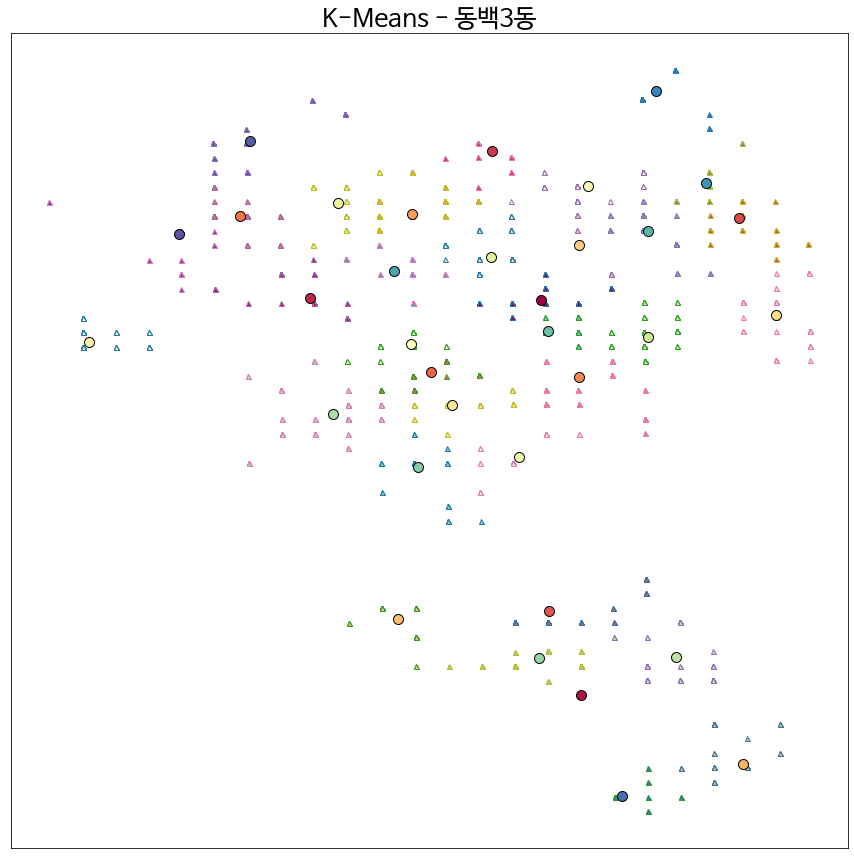

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_6_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(34), colors):
    my_members = (k_means_6_labels == k)

    # 중심 정의
    cluster_center = k_means_6_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[6][my_members, 0], all_data[6][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 동백3동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

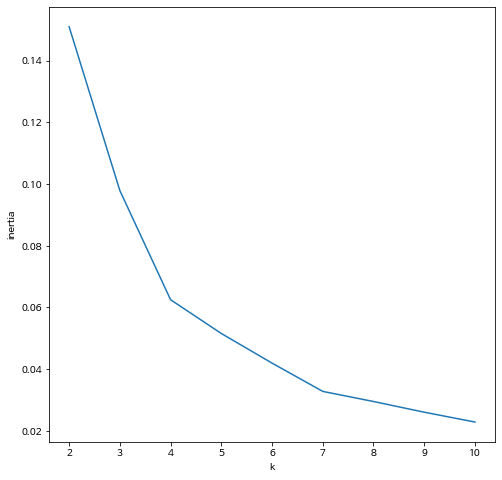

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[6])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4

## 동부동

In [ ]:
k_means_7 = KMeans(init = "k-means++", n_clusters=12, n_init=12, random_state = 42)
k_means_7.fit(all_data[7])

KMeans(n_clusters=12, n_init=12, random_state=42)

In [ ]:
k_means_7_labels = k_means_7.labels_
print('k_means_7_labels : ', k_means_7_labels)

k_means_7_cluster_centers = k_means_7.cluster_centers_
print('k_means_7_cluster_centers : ', k_means_7_cluster_centers)

k_means_7_labels :  [3 0 1 ... 4 9 8]
k_means_7_cluster_centers :  [[127.21643879  37.22896554]
 [127.24659339  37.22884746]
 [127.26863699  37.18849467]
 [127.23563366  37.20536703]
 [127.21472399  37.23442586]
 [127.24149642  37.23454696]
 [127.2365676   37.21578865]
 [127.21903664  37.2341817 ]
 [127.24958435  37.19009569]
 [127.21195286  37.23541949]
 [127.24933413  37.20122801]
 [127.22550135  37.22536251]]


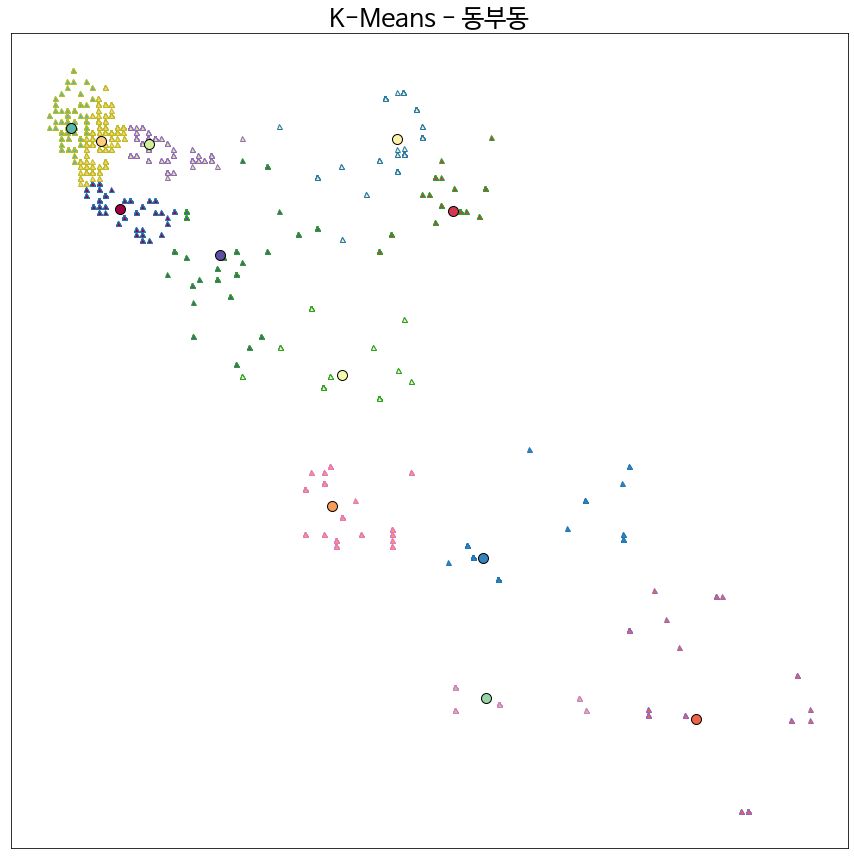

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_7_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(12), colors):
    my_members = (k_means_7_labels == k)

    # 중심 정의
    cluster_center = k_means_7_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[7][my_members, 0], all_data[7][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 동부동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

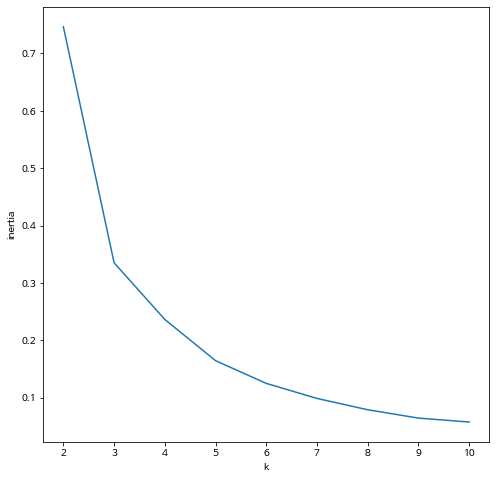

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[7])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 동천동

In [ ]:
k_means_8 = KMeans(init = "k-means++", n_clusters=16, n_init=12, random_state = 42)
k_means_8.fit(all_data[8])

KMeans(n_clusters=16, n_init=12, random_state=42)

In [ ]:
k_means_8_labels = k_means_8.labels_
print('k_means_8_labels : ', k_means_8_labels)

k_means_8_cluster_centers = k_means_8.cluster_centers_
print('k_means_8_cluster_centers : ', k_means_8_cluster_centers)

k_means_8_labels :  [ 3 10 13 ...  9 10  3]
k_means_8_cluster_centers :  [[127.03445597  37.36934785]
 [127.09324497  37.34049069]
 [127.05612409  37.3593567 ]
 [127.09823917  37.33482427]
 [127.062459    37.34374693]
 [127.09164212  37.33279895]
 [127.0988538   37.34166822]
 [127.04315118  37.35866687]
 [127.0853615   37.34720099]
 [127.085262    37.33807799]
 [127.09539721  37.33770085]
 [127.0893055   37.33627381]
 [127.07206214  37.3364693 ]
 [127.09064169  37.34537696]
 [127.10155944  37.33916291]
 [127.06724303  37.35527714]]


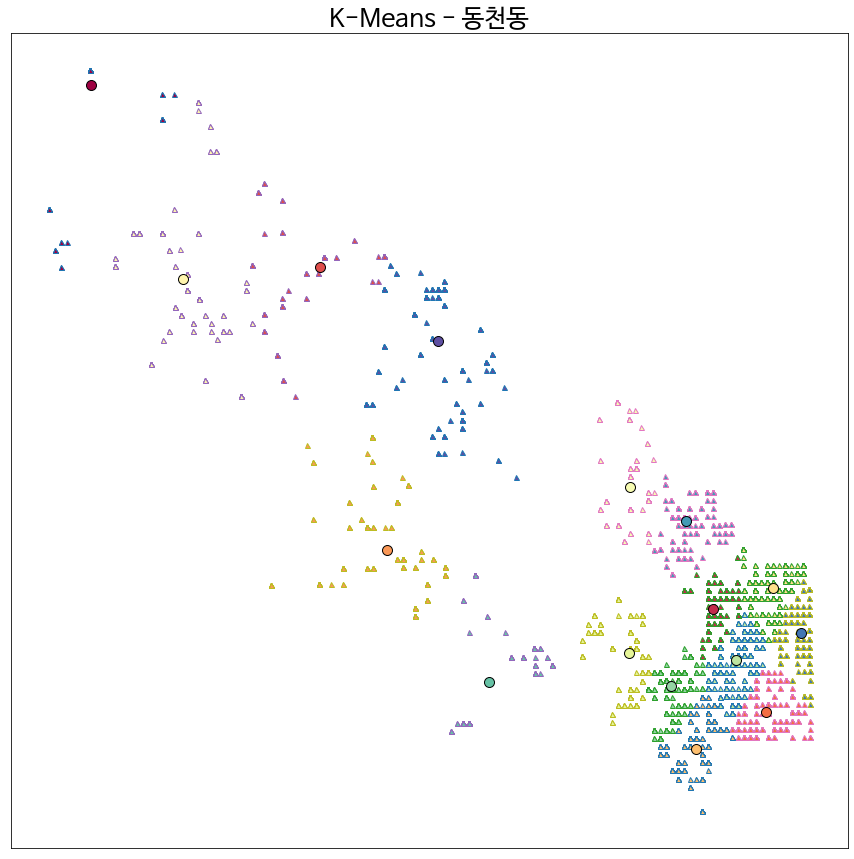

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_8_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(16), colors):
    my_members = (k_means_8_labels == k)

    # 중심 정의
    cluster_center = k_means_8_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[8][my_members, 0], all_data[8][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 동천동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

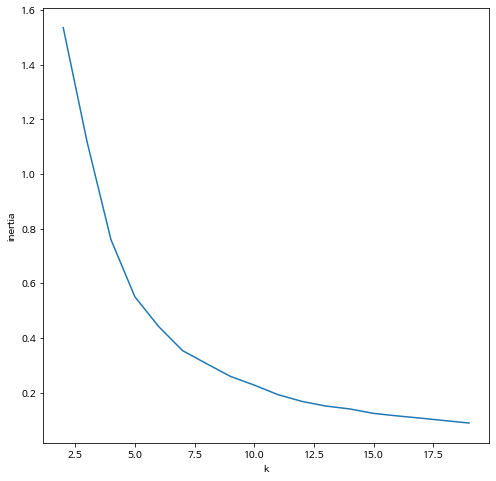

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[8])
  inertia.append(km.inertia_)
plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 7

## 마북동

In [ ]:
k_means_9 = KMeans(init = "k-means++", n_clusters=34, n_init=12, random_state = 42)
k_means_9.fit(all_data[9])

KMeans(n_clusters=34, n_init=12, random_state=42)

In [ ]:
k_means_9_labels = k_means_9.labels_
print('k_means_9_labels : ', k_means_9_labels)

k_means_9_cluster_centers = k_means_9.cluster_centers_
print('k_means_9_cluster_centers : ', k_means_9_cluster_centers)

k_means_9_labels :  [14 20 22 ... 27 24 31]
k_means_9_cluster_centers :  [[127.11458885  37.30088824]
 [127.13483114  37.31061001]
 [127.12551705  37.30173976]
 [127.11171984  37.29241308]
 [127.12893386  37.30721671]
 [127.11085134  37.30093111]
 [127.13034713  37.31928666]
 [127.1388202   37.30560472]
 [127.11970627  37.29998126]
 [127.14009705  37.31093854]
 [127.13058018  37.30962491]
 [127.11246451  37.29708711]
 [127.12740296  37.30807168]
 [127.12375718  37.30195389]
 [127.11687056  37.29668142]
 [127.10815065  37.29342358]
 [127.10819545  37.30067883]
 [127.13055619  37.31412577]
 [127.12533904  37.30430814]
 [127.13500374  37.30808189]
 [127.11098568  37.29434645]
 [127.1372597   37.31047286]
 [127.12737068  37.30333384]
 [127.11885884  37.30241819]
 [127.11334168  37.29451933]
 [127.11246348  37.30268452]
 [127.13259463  37.32124187]
 [127.11128804  37.29912498]
 [127.12666567  37.31582057]
 [127.13608667  37.3053878 ]
 [127.12137943  37.30245052]
 [127.10483205  37.30097648]

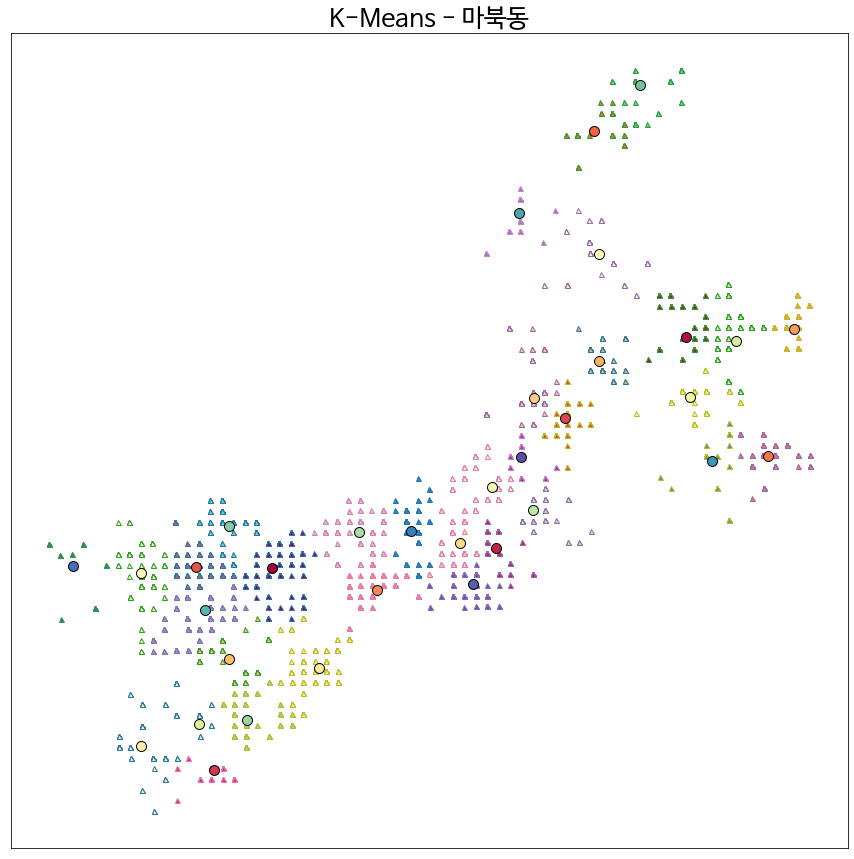

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_9_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(34), colors):
    my_members = (k_means_9_labels == k)

    # 중심 정의
    cluster_center = k_means_9_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[9][my_members, 0], all_data[9][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 마북동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

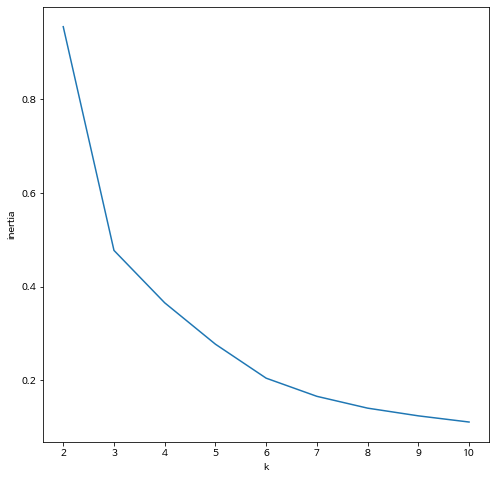

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[9])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 모현읍

In [ ]:
k_means_10 = KMeans(init = "k-means++", n_clusters=16, n_init=12, random_state = 42)
k_means_10.fit(all_data[10])

KMeans(n_clusters=16, n_init=12, random_state=42)

In [ ]:
k_means_10_labels = k_means_10.labels_
print('k_means_10_labels : ', k_means_10_labels)

k_means_10_cluster_centers = k_means_10.cluster_centers_
print('k_means_10_cluster_centers : ', k_means_10_cluster_centers)

k_means_10_labels :  [ 9  4 15 ...  6  1  5]
k_means_10_cluster_centers :  [[127.25309561  37.34502675]
 [127.17746539  37.34037355]
 [127.2506012   37.30939616]
 [127.14588198  37.32977273]
 [127.22350066  37.35373967]
 [127.25124469  37.33433267]
 [127.17082878  37.31238117]
 [127.24835437  37.32418151]
 [127.19303396  37.33990422]
 [127.16008128  37.33252829]
 [127.26593507  37.33748383]
 [127.22227354  37.33469255]
 [127.23109417  37.34891945]
 [127.15118754  37.31442521]
 [127.26281667  37.31428768]
 [127.24274968  37.33675187]]


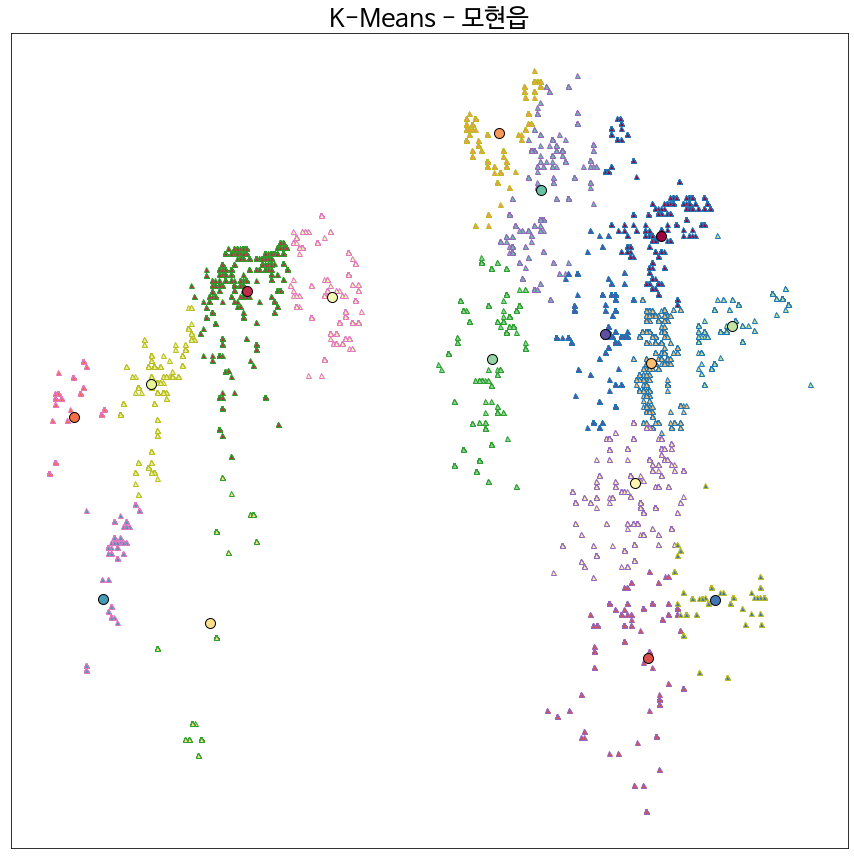

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_10_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(16), colors):
    my_members = (k_means_10_labels == k)

    # 중심 정의
    cluster_center = k_means_10_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[10][my_members, 0], all_data[10][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 모현읍', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

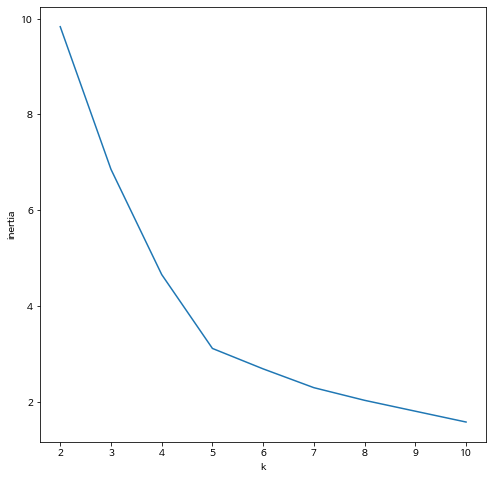

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[10])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 5

## 백암면

In [ ]:
k_means_11 = KMeans(init = "k-means++", n_clusters=18, n_init=12, random_state = 42)
k_means_11.fit(all_data[11])

KMeans(n_clusters=18, n_init=12, random_state=42)

In [ ]:
k_means_11_labels = k_means_11.labels_
print('k_means_11_labels : ', k_means_11_labels)

k_means_11_cluster_centers = k_means_11.cluster_centers_
print('k_means_11_cluster_centers : ', k_means_11_cluster_centers)

k_means_11_labels :  [ 2 13  1 ...  1  1 14]
k_means_11_cluster_centers :  [[127.37223608  37.17918797]
 [127.40244163  37.13322719]
 [127.39048862  37.15071175]
 [127.33897298  37.17877632]
 [127.40772318  37.09845611]
 [127.3743026   37.13615133]
 [127.37437065  37.16534467]
 [127.4170129   37.13356848]
 [127.36473188  37.19225118]
 [127.3776548   37.11553861]
 [127.39834577  37.14316573]
 [127.3959042   37.17177758]
 [127.35648435  37.16546423]
 [127.38960631  37.13857278]
 [127.41604437  37.14413495]
 [127.3586529   37.17456839]
 [127.35471175  37.12010683]
 [127.39934009  37.16084684]]


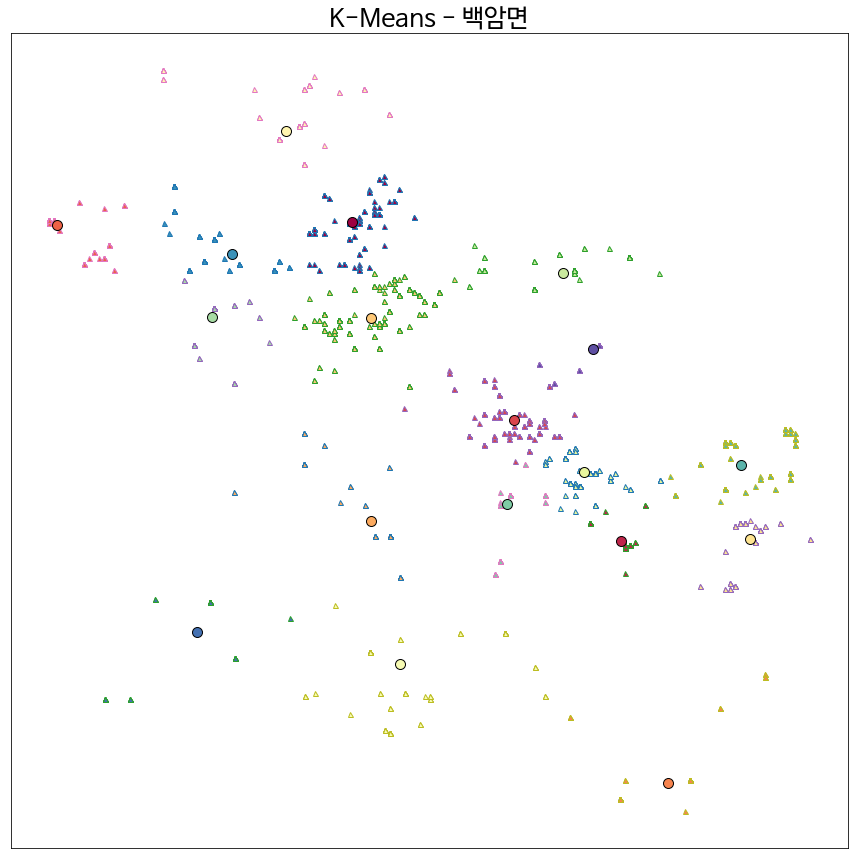

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_11_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(18), colors):
    my_members = (k_means_11_labels == k)

    # 중심 정의
    cluster_center = k_means_11_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[11][my_members, 0], all_data[11][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 백암면', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

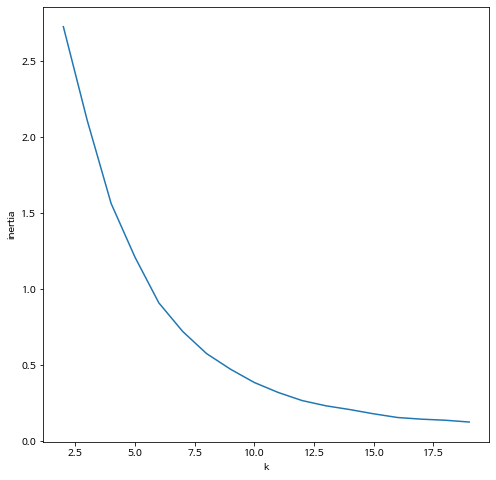

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[11])
  inertia.append(km.inertia_)
plt.plot(range(2, 20), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 10

## 보라동

In [ ]:
k_means_12 = KMeans(init = "k-means++", n_clusters=16, n_init=12, random_state = 42)
k_means_12.fit(all_data[12])

KMeans(n_clusters=16, n_init=12, random_state=42)

In [ ]:
k_means_12_labels = k_means_12.labels_
print('k_means_12_labels : ', k_means_12_labels)

k_means_12_cluster_centers = k_means_12.cluster_centers_
print('k_means_12_cluster_centers : ', k_means_12_cluster_centers)

k_means_12_labels :  [ 4  1  5 ...  5  4 13]
k_means_12_cluster_centers :  [[127.12798621  37.2519678 ]
 [127.11609104  37.25335749]
 [127.1363806   37.24026773]
 [127.12298139  37.2530762 ]
 [127.10665931  37.25359015]
 [127.1359722   37.25094464]
 [127.11768009  37.25561308]
 [127.1070313   37.24782909]
 [127.1418275   37.22650886]
 [127.11159035  37.24937076]
 [127.1532368   37.23177926]
 [127.10739618  37.25812379]
 [127.14397887  37.24535118]
 [127.11196717  37.25400039]
 [127.1143714   37.25872225]
 [127.1196732   37.25050285]]


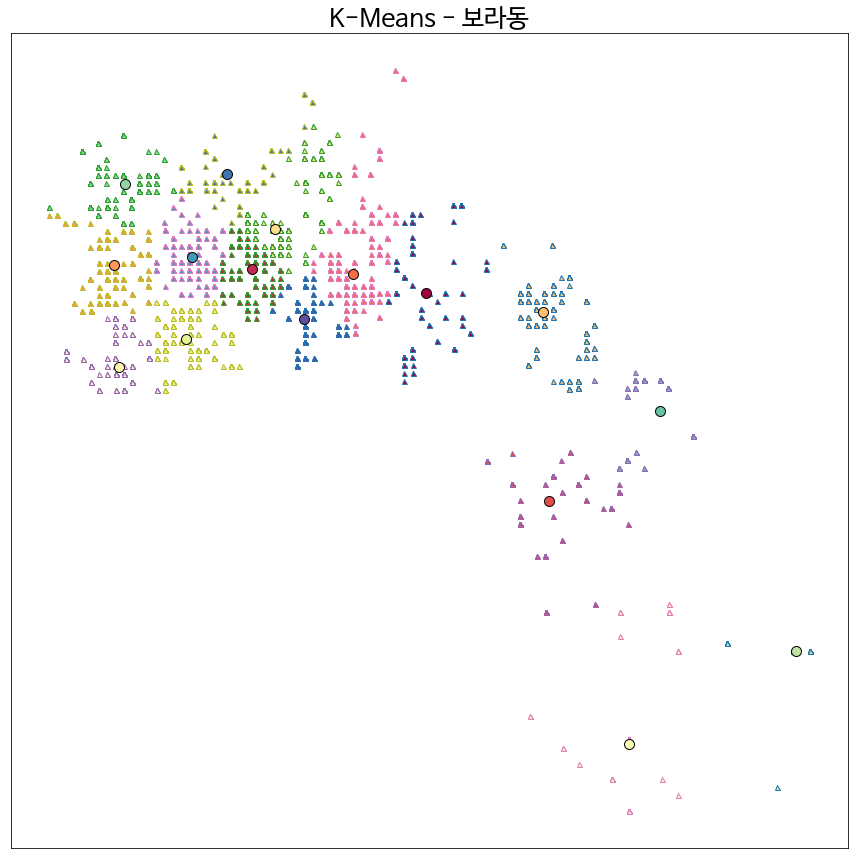

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_12_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(16), colors):
    my_members = (k_means_12_labels == k)

    # 중심 정의
    cluster_center = k_means_12_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[12][my_members, 0], all_data[12][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 보라동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

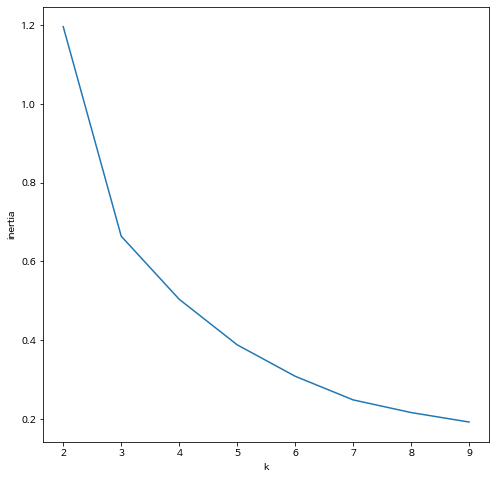

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 10):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[12])
  inertia.append(km.inertia_)
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 보정동

In [ ]:
k_means_13 = KMeans(init = "k-means++", n_clusters=21, n_init=12, random_state = 42)
k_means_13.fit(all_data[13])

KMeans(n_clusters=21, n_init=12, random_state=42)

In [ ]:
k_means_13_labels = k_means_13.labels_
print('k_means_13_labels : ', k_means_13_labels)

k_means_13_cluster_centers = k_means_13.cluster_centers_
print('k_means_13_cluster_centers : ', k_means_13_cluster_centers)

k_means_13_labels :  [18 10  0 ...  3 11 15]
k_means_13_cluster_centers :  [[127.11044908  37.3195304 ]
 [127.10725834  37.30583013]
 [127.0959915   37.30971284]
 [127.10065047  37.3007286 ]
 [127.11715527  37.3177054 ]
 [127.10985581  37.31268098]
 [127.11344114  37.3064175 ]
 [127.10262955  37.31918734]
 [127.0961672   37.30350543]
 [127.12210423  37.30735225]
 [127.1125955   37.31200733]
 [127.12323558  37.31783911]
 [127.11330511  37.31752666]
 [127.11004916  37.30437724]
 [127.10091533  37.29539162]
 [127.10987112  37.32173963]
 [127.09842721  37.30647604]
 [127.10751472  37.30870045]
 [127.11436207  37.31991921]
 [127.09520767  37.29773641]
 [127.10180033  37.31360336]]


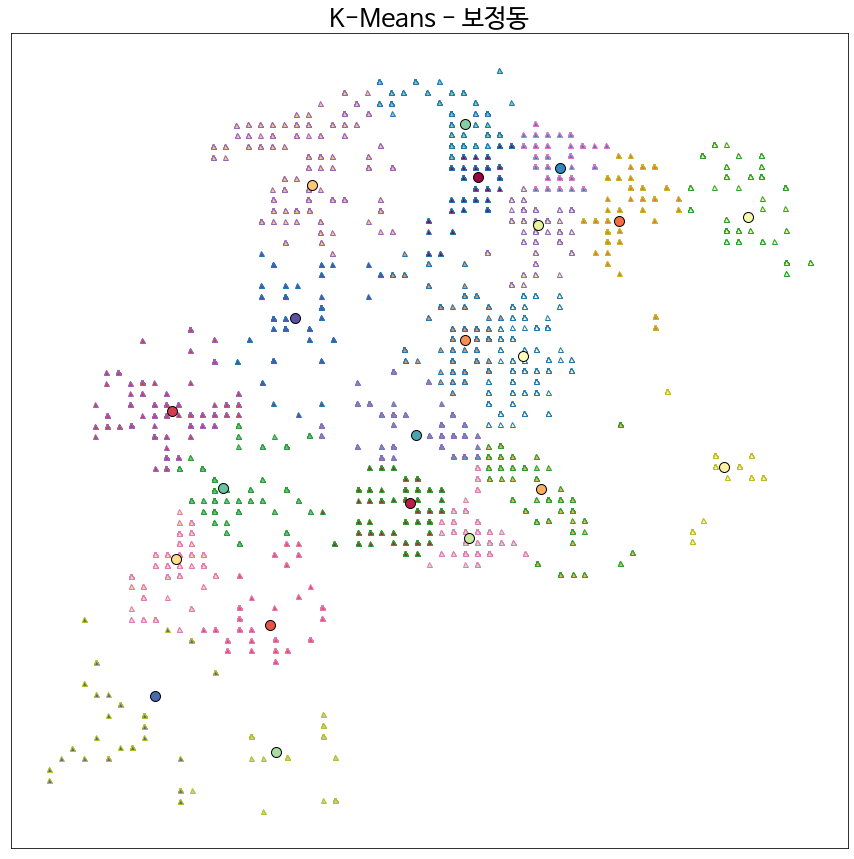

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_13_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(21), colors):
    my_members = (k_means_13_labels == k)

    # 중심 정의
    cluster_center = k_means_13_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[13][my_members, 0], all_data[13][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 보정동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

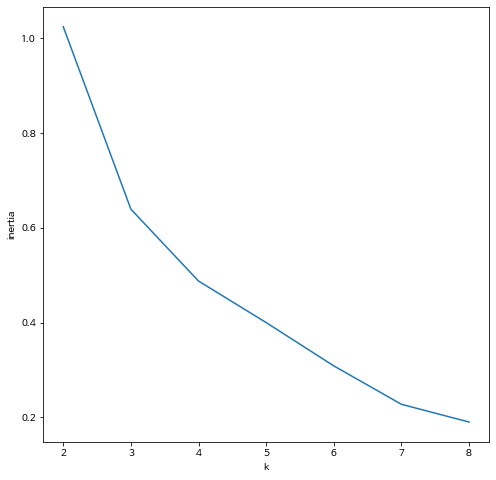

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 9):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[13])
  inertia.append(km.inertia_)
plt.plot(range(2, 9), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

## 상갈동

In [ ]:
k_means_14 = KMeans(init = "k-means++", n_clusters=11, n_init=12, random_state = 42)
k_means_14.fit(all_data[14])

KMeans(n_clusters=11, n_init=12, random_state=42)

In [ ]:
k_means_14_labels = k_means_14.labels_
print('k_means_14_labels : ', k_means_14_labels)

k_means_14_cluster_centers = k_means_14.cluster_centers_
print('k_means_14_cluster_centers : ', k_means_14_cluster_centers)

k_means_14_labels :  [9 2 3 ... 1 7 8]
k_means_14_cluster_centers :  [[127.10697566  37.26237202]
 [127.11205342  37.26642267]
 [127.10663255  37.26611041]
 [127.11017236  37.26277134]
 [127.10401826  37.26148172]
 [127.11317053  37.26952405]
 [127.10180868  37.26666228]
 [127.10591108  37.26806006]
 [127.1100163   37.26505667]
 [127.10814471  37.26892593]
 [127.11656353  37.26348278]]


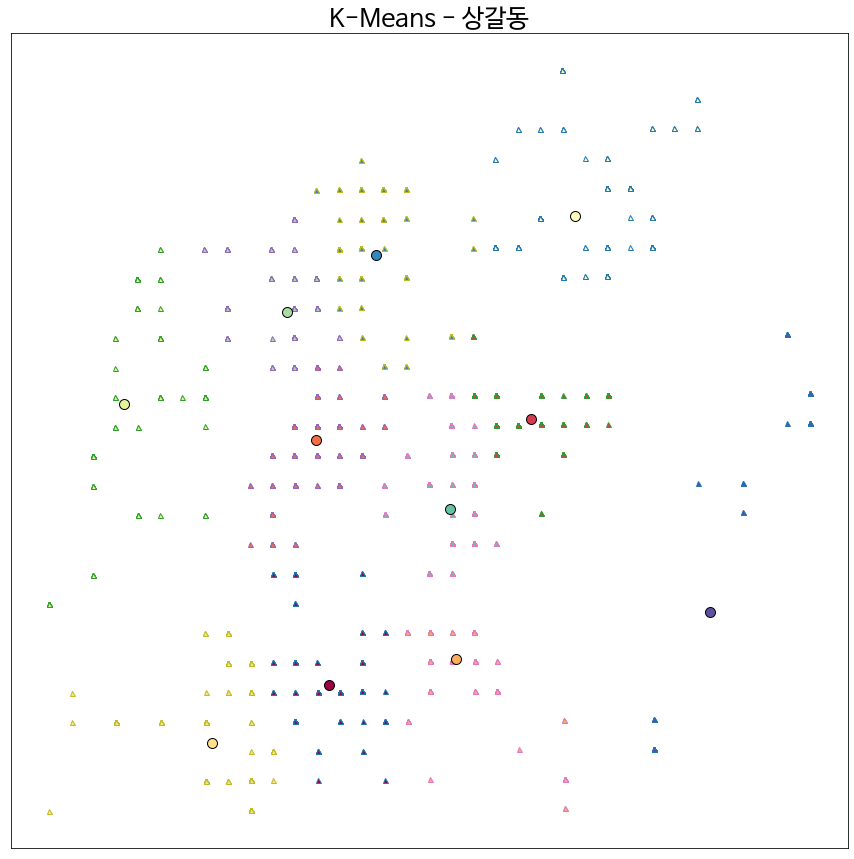

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_14_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(11), colors):
    my_members = (k_means_14_labels == k)

    # 중심 정의
    cluster_center = k_means_14_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[14][my_members, 0], all_data[14][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 상갈동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

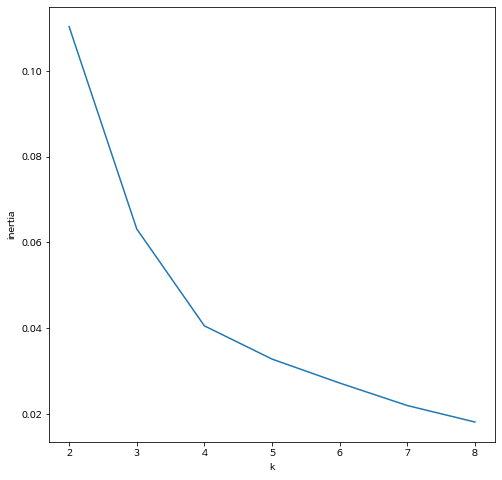

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 9):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[14])
  inertia.append(km.inertia_)
plt.plot(range(2, 9), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4

##상하동


In [ ]:
k_means_15 = KMeans(init = "k-means++", n_clusters=18, n_init=12, random_state = 42)
k_means_15.fit(all_data[15])


KMeans(n_clusters=18, n_init=12, random_state=42)

In [ ]:
k_means_15_labels = k_means_15.labels_ 
print('k_means_15_labels : ', k_means_15_labels)

k_means_15_cluster_centers = k_means_15.cluster_centers_
print('k_means_15_cluster_centers : ', k_means_15_cluster_centers)


k_means_15_labels :  [7 1 6 ... 6 3 0]
k_means_15_cluster_centers :  [[127.14157898  37.25594331]
 [127.13575067  37.27090821]
 [127.14378111  37.26716993]
 [127.1388157   37.25939756]
 [127.13771244  37.2755591 ]
 [127.14903481  37.25542068]
 [127.13962777  37.27210108]
 [127.1367138   37.26805637]
 [127.14112936  37.26267425]
 [127.13869465  37.25734347]
 [127.14471702  37.25521852]
 [127.13536728  37.25697073]
 [127.14104787  37.25217812]
 [127.15333754  37.24933164]
 [127.13666682  37.28014194]
 [127.13708925  37.2612145 ]
 [127.1365636   37.27317209]
 [127.14605383  37.26408587]]


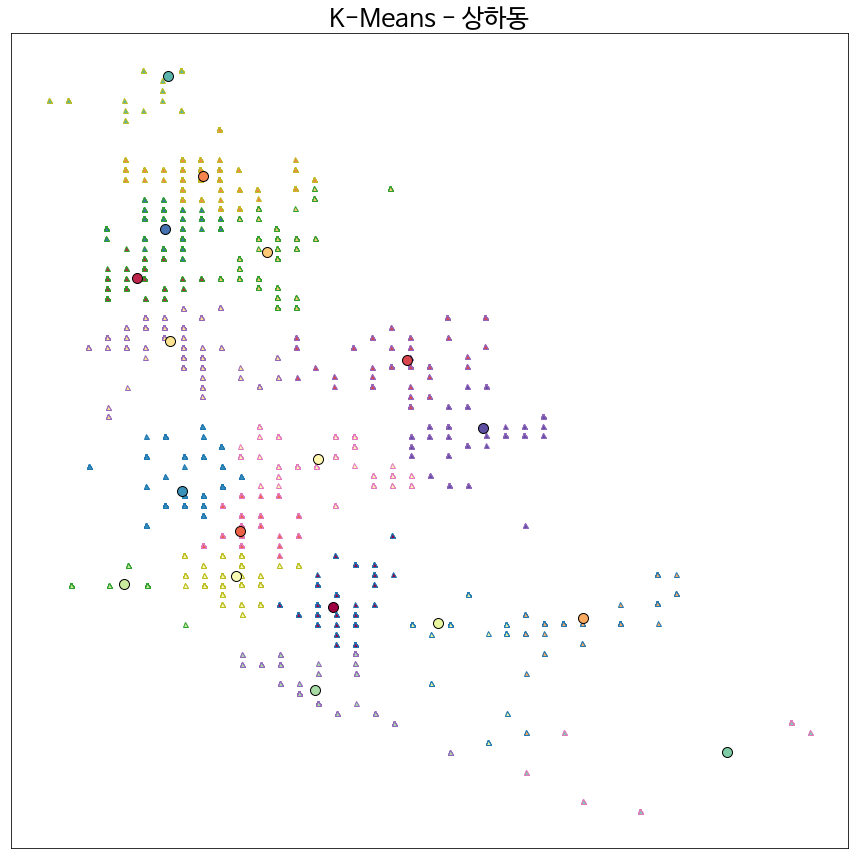

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_15_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(18), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_15_labels == k)

    # 중심 정의
    cluster_center = k_means_15_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[15][my_members, 0], all_data[15][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title("K-Means - 상하동", fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

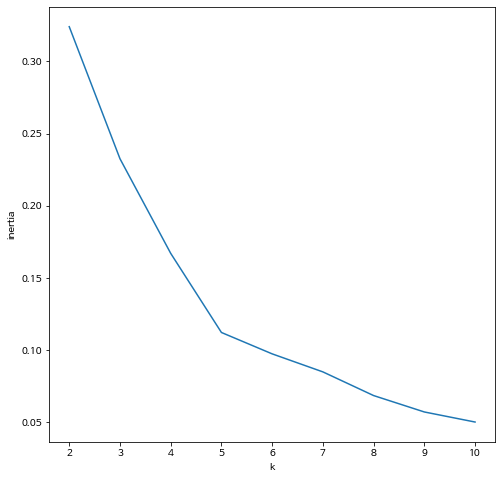

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[15])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 5

##상현1동

In [ ]:
k_means_16 = KMeans(init = "k-means++", n_clusters=18, n_init=12, random_state = 42)
k_means_16.fit(all_data[16])


KMeans(n_clusters=18, n_init=12, random_state=42)

In [ ]:
k_means_16_labels = k_means_16.labels_ 
print('k_means_16_labels : ', k_means_16_labels)

k_means_16_cluster_centers = k_means_16.cluster_centers_
print('k_means_16_cluster_centers : ', k_means_16_cluster_centers)


k_means_16_labels :  [3 3 8 ... 1 0 6]
k_means_16_cluster_centers :  [[127.08003188  37.30868293]
 [127.07133112  37.29693565]
 [127.0769926   37.30053056]
 [127.07919376  37.30562444]
 [127.07343324  37.30615847]
 [127.06590055  37.2976473 ]
 [127.07428455  37.29613511]
 [127.08074796  37.30317158]
 [127.073883    37.30188697]
 [127.0825677   37.30660644]
 [127.06636061  37.30086732]
 [127.07099542  37.30064055]
 [127.07699241  37.30848374]
 [127.07762292  37.29531882]
 [127.08261681  37.30921735]
 [127.07371314  37.30865085]
 [127.06910228  37.29686561]
 [127.07757998  37.30347213]]


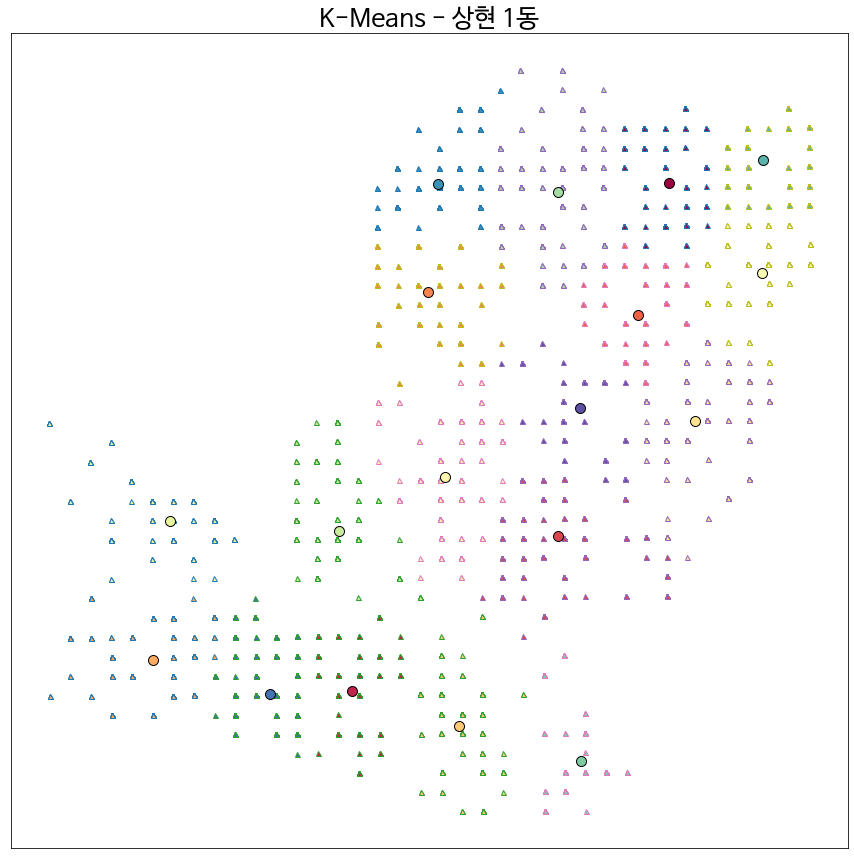

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_16_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(18), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_16_labels == k)

    # 중심 정의
    cluster_center = k_means_16_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[16][my_members, 0], all_data[16][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 상현 1동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()



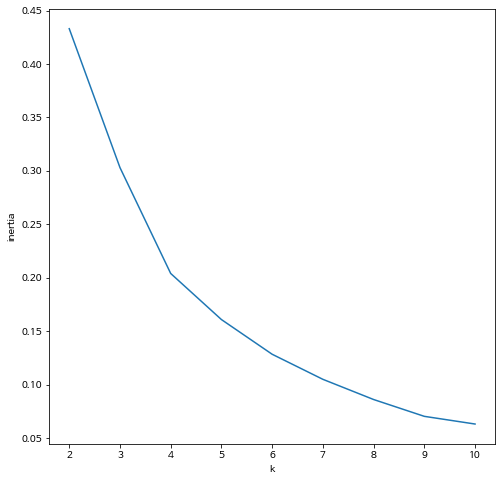

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[16])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4


##상현 2동

In [ ]:
k_means_17 = KMeans(init = "k-means++", n_clusters=19, n_init=12, random_state = 42)
k_means_17.fit(all_data[17])


KMeans(n_clusters=19, n_init=12, random_state=42)

In [ ]:
k_means_17_labels = k_means_17.labels_ 
print('k_means_17_labels : ', k_means_17_labels)

k_means_17_cluster_centers = k_means_17.cluster_centers_
print('k_means_17_cluster_centers : ', k_means_17_cluster_centers)


k_means_17_labels :  [8 2 1 ... 3 1 0]
k_means_17_cluster_centers :  [[127.08981227  37.31186906]
 [127.08377745  37.30435837]
 [127.0906827   37.30584925]
 [127.08652768  37.30867524]
 [127.08101998  37.29776929]
 [127.08566619  37.31126511]
 [127.08747941  37.30469647]
 [127.09111968  37.31345445]
 [127.09000709  37.30947374]
 [127.09271363  37.31225395]
 [127.08448074  37.3093983 ]
 [127.08476259  37.3013117 ]
 [127.09047688  37.30423086]
 [127.08807385  37.30640031]
 [127.08747727  37.31319537]
 [127.08933149  37.29987678]
 [127.08826855  37.31046502]
 [127.09289976  37.31390445]
 [127.08497495  37.30692314]]


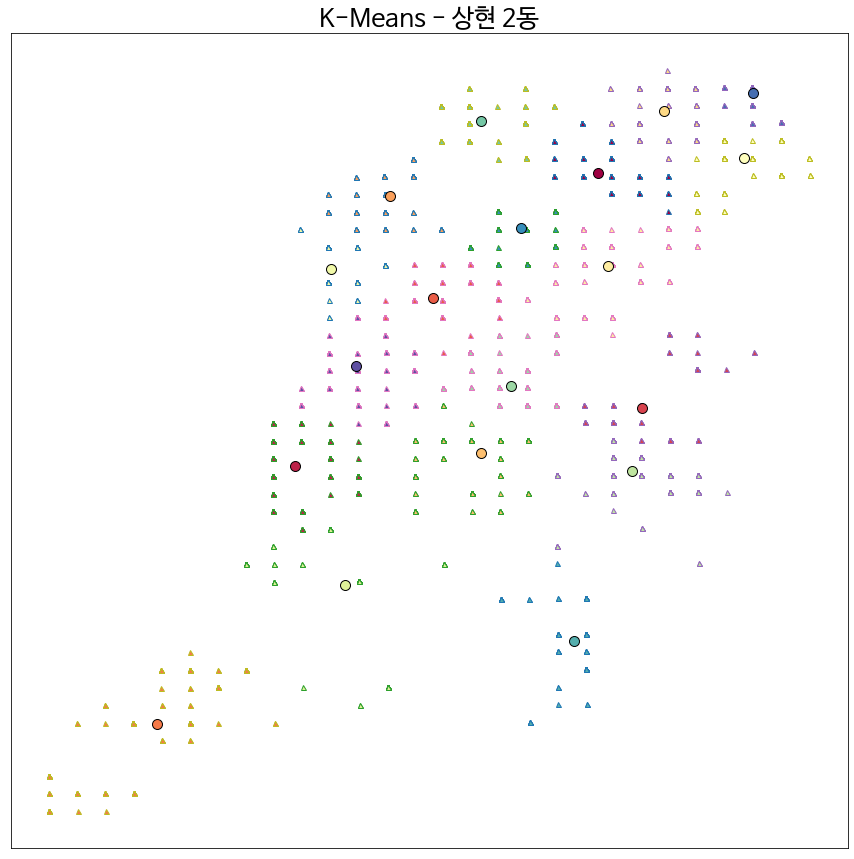

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_17_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(19), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_17_labels == k)

    # 중심 정의
    cluster_center = k_means_17_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[17][my_members, 0], all_data[17][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 상현 2동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


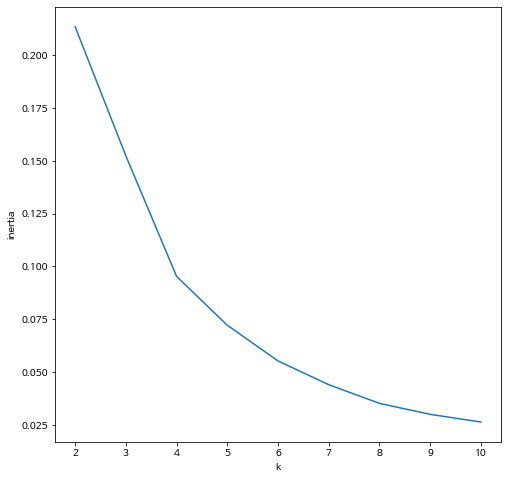

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[17])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4


##서농동

In [ ]:
k_means_18 = KMeans(init = "k-means++", n_clusters=35, n_init=12, random_state = 42)
k_means_18.fit(all_data[18])


KMeans(n_clusters=35, n_init=12, random_state=42)

In [ ]:
k_means_18_labels = k_means_18.labels_ 
print('k_means_18_labels : ', k_means_18_labels)

k_means_18_cluster_centers = k_means_18.cluster_centers_
print('k_means_18_cluster_centers : ', k_means_18_cluster_centers)



k_means_18_labels :  [22  6 18 ...  6 14  1]
k_means_18_cluster_centers :  [[127.07185071  37.23138253]
 [127.08365026  37.22645493]
 [127.071826    37.23909454]
 [127.08036755  37.23147961]
 [127.07682661  37.22805109]
 [127.0751209   37.24470616]
 [127.06919447  37.23573363]
 [127.06793606  37.24122866]
 [127.08923845  37.22330479]
 [127.0861012   37.22828372]
 [127.07417087  37.23527948]
 [127.07050015  37.24519558]
 [127.0844318   37.22036149]
 [127.07835508  37.23840819]
 [127.07983628  37.22956443]
 [127.08050964  37.24666967]
 [127.07538726  37.22911897]
 [127.08427588  37.23153659]
 [127.07476748  37.23746955]
 [127.07856385  37.22585078]
 [127.08780156  37.22017593]
 [127.07016629  37.23126489]
 [127.06886925  37.24439545]
 [127.07188384  37.24407842]
 [127.08772472  37.22711914]
 [127.07773375  37.23463838]
 [127.08127317  37.22267136]
 [127.07489262  37.23291142]
 [127.071376    37.23466906]
 [127.0906794   37.22579978]
 [127.08449354  37.2343485 ]
 [127.07286501  37.2458590

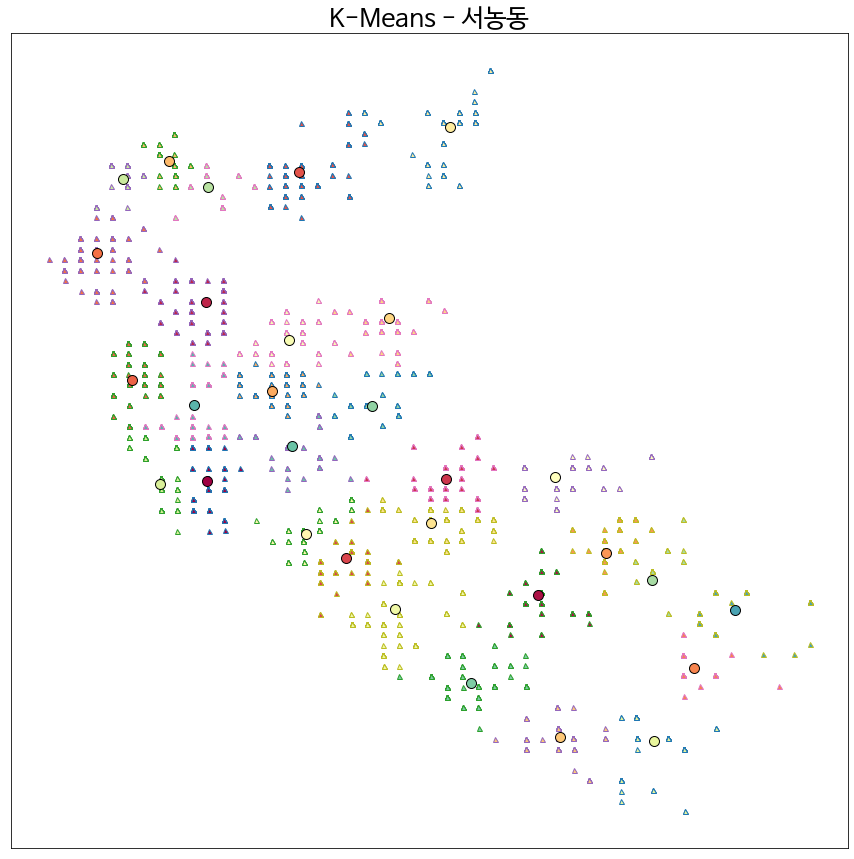

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_18_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(30), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_18_labels == k)

    # 중심 정의
    cluster_center = k_means_18_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[18][my_members, 0], all_data[18][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 서농동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


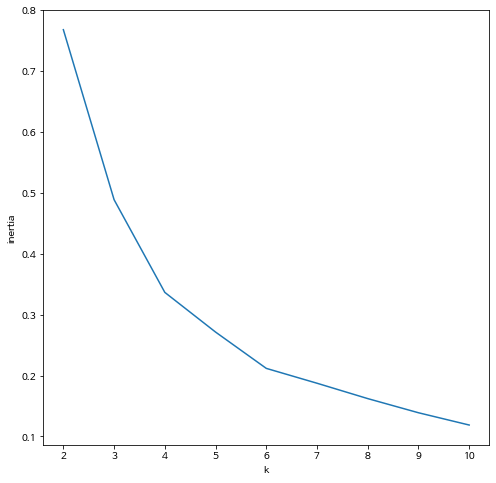

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[18])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 6


##성복동

In [ ]:
k_means_19 = KMeans(init = "k-means++", n_clusters=45, n_init=12, random_state = 42)
k_means_19.fit(all_data[19])


KMeans(n_clusters=45, n_init=12, random_state=42)

In [ ]:
k_means_19_labels = k_means_19.labels_ 
print('k_means_19_labels : ', k_means_19_labels)

k_means_19_cluster_centers = k_means_19.cluster_centers_
print('k_means_19_cluster_centers : ', k_means_19_cluster_centers)

k_means_19_labels :  [21 12 15 ... 33  8 14]
k_means_19_cluster_centers :  [[127.05499127  37.32412047]
 [127.0766315   37.31231637]
 [127.06747629  37.31678747]
 [127.07356374  37.31912601]
 [127.08161156  37.31271019]
 [127.06347326  37.3212977 ]
 [127.06084012  37.3154024 ]
 [127.06852373  37.32020985]
 [127.08027327  37.31556101]
 [127.07597093  37.31708969]
 [127.05921067  37.31841778]
 [127.07224065  37.31545021]
 [127.08316249  37.31264492]
 [127.06629625  37.31494885]
 [127.06145655  37.3228326 ]
 [127.07026128  37.31889625]
 [127.0653236   37.31726458]
 [127.06246751  37.31411401]
 [127.07807893  37.31345526]
 [127.07303098  37.31788634]
 [127.0587176   37.32690731]
 [127.07296532  37.31331466]
 [127.05224521  37.3239806 ]
 [127.06163381  37.3188116 ]
 [127.06801999  37.31440048]
 [127.07688368  37.31894253]
 [127.07143722  37.31740434]
 [127.07204394  37.3192586 ]
 [127.06655786  37.32012469]
 [127.06019204  37.32248094]
 [127.08125461  37.31074832]
 [127.08134684  37.3176553

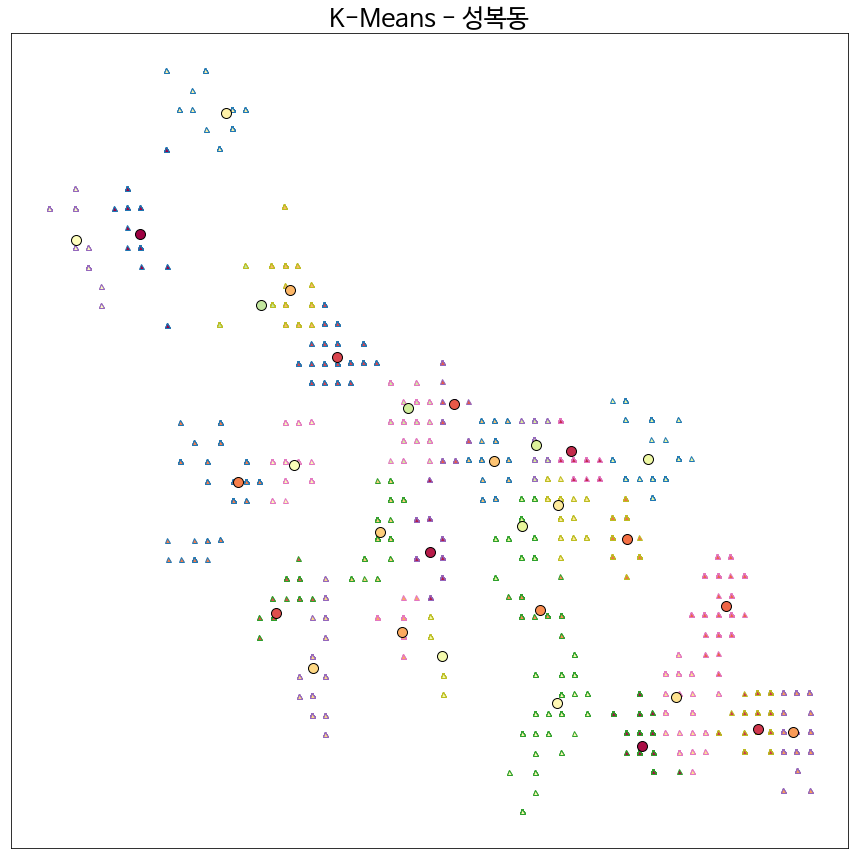

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_19_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(30), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_19_labels == k)

    # 중심 정의
    cluster_center = k_means_19_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[19][my_members, 0], all_data[19][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 성복동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()



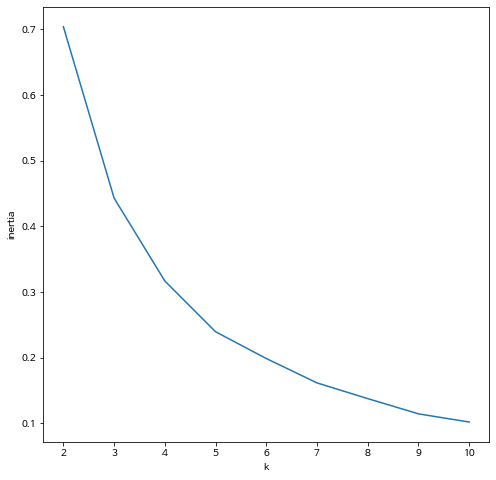

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[19])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 5


##신갈동

In [ ]:
k_means_20 = KMeans(init = "k-means++", n_clusters=30, n_init=12, random_state = 42)
k_means_20.fit(all_data[20])


KMeans(n_clusters=30, n_init=12, random_state=42)

In [ ]:
k_means_20_labels = k_means_20.labels_ 
print('k_means_20_labels : ', k_means_20_labels)

k_means_20_cluster_centers = k_means_20.cluster_centers_
print('k_means_20_cluster_centers : ', k_means_20_cluster_centers)


k_means_20_labels :  [ 7  2  7 ...  2 26 16]
k_means_20_cluster_centers :  [[127.10175219  37.27627981]
 [127.11092544  37.28766959]
 [127.10861697  37.27694153]
 [127.10307131  37.29147977]
 [127.11952691  37.28787366]
 [127.10632171  37.28181243]
 [127.09063303  37.28500928]
 [127.10827521  37.27227509]
 [127.11447289  37.28868939]
 [127.09074241  37.29050904]
 [127.10133176  37.27072383]
 [127.10811434  37.27471211]
 [127.10174801  37.28511417]
 [127.10047227  37.27939787]
 [127.09775166  37.27658103]
 [127.10706593  37.27877829]
 [127.11079678  37.28979872]
 [127.10977766  37.28024498]
 [127.09227851  37.27936168]
 [127.10376982  37.27808896]
 [127.10830353  37.28690131]
 [127.10698946  37.28367989]
 [127.10455553  37.27065021]
 [127.11071295  37.28561607]
 [127.10215426  37.27286199]
 [127.11768903  37.28956212]
 [127.10596741  37.27555411]
 [127.11037792  37.2821799 ]
 [127.10018245  37.28946256]
 [127.09982434  37.27384341]]


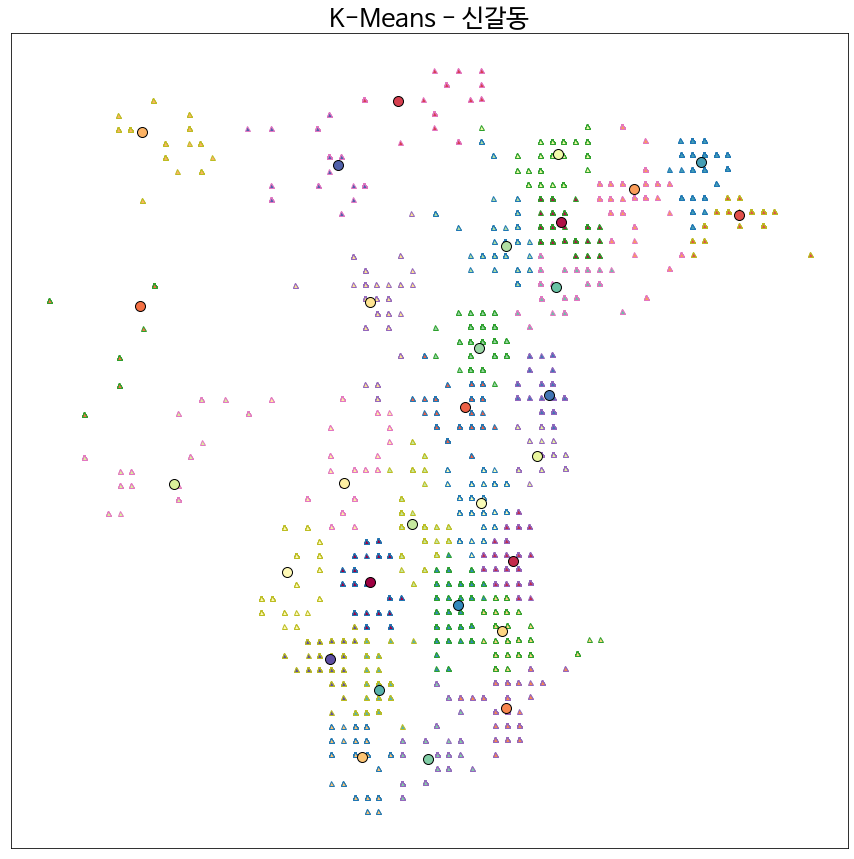

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_20_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(30), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_20_labels == k)

    # 중심 정의
    cluster_center = k_means_20_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[20][my_members, 0], all_data[20][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 신갈동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()



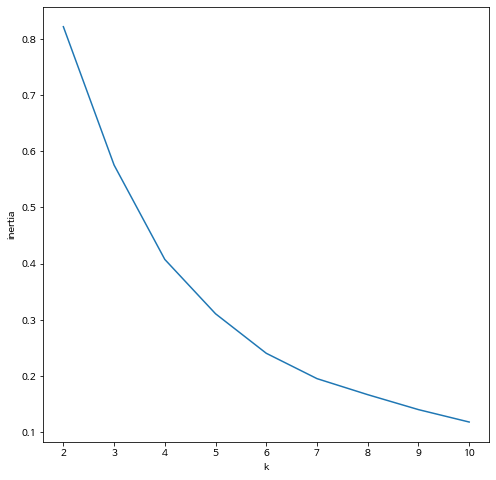

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[20])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4


##신봉동

In [ ]:
k_means_21 = KMeans(init = "k-means++", n_clusters=31, n_init=12, random_state = 42)
k_means_21.fit(all_data[21])


KMeans(n_clusters=31, n_init=12, random_state=42)

In [ ]:
k_means_21_labels = k_means_21.labels_ 
print('k_means_21_labels : ', k_means_21_labels)

k_means_21_cluster_centers = k_means_21.cluster_centers_
print('k_means_21_cluster_centers : ', k_means_21_cluster_centers)


k_means_21_labels :  [ 7 26  4 ... 20 13 11]
k_means_21_cluster_centers :  [[127.07811905  37.32622991]
 [127.07019773  37.33090445]
 [127.05296096  37.33489336]
 [127.06742729  37.32646009]
 [127.08139411  37.32000857]
 [127.07302406  37.32656352]
 [127.06514431  37.33297414]
 [127.08087743  37.32367336]
 [127.05998501  37.33950689]
 [127.07831569  37.32847569]
 [127.06488038  37.32889197]
 [127.07484033  37.32929954]
 [127.05679198  37.33285373]
 [127.07858408  37.32376132]
 [127.07842946  37.32092958]
 [127.07064943  37.32823331]
 [127.07128631  37.32409257]
 [127.08293478  37.32381521]
 [127.0739835   37.32446241]
 [127.0611923   37.32713602]
 [127.06580061  37.32648835]
 [127.06692279  37.33146565]
 [127.06919713  37.325693  ]
 [127.05742336  37.33510115]
 [127.08346609  37.32039081]
 [127.07321005  37.3288357 ]
 [127.05861023  37.33762009]
 [127.07624778  37.32777691]
 [127.06820177  37.32817822]
 [127.07022492  37.33412168]
 [127.07640318  37.32431053]]


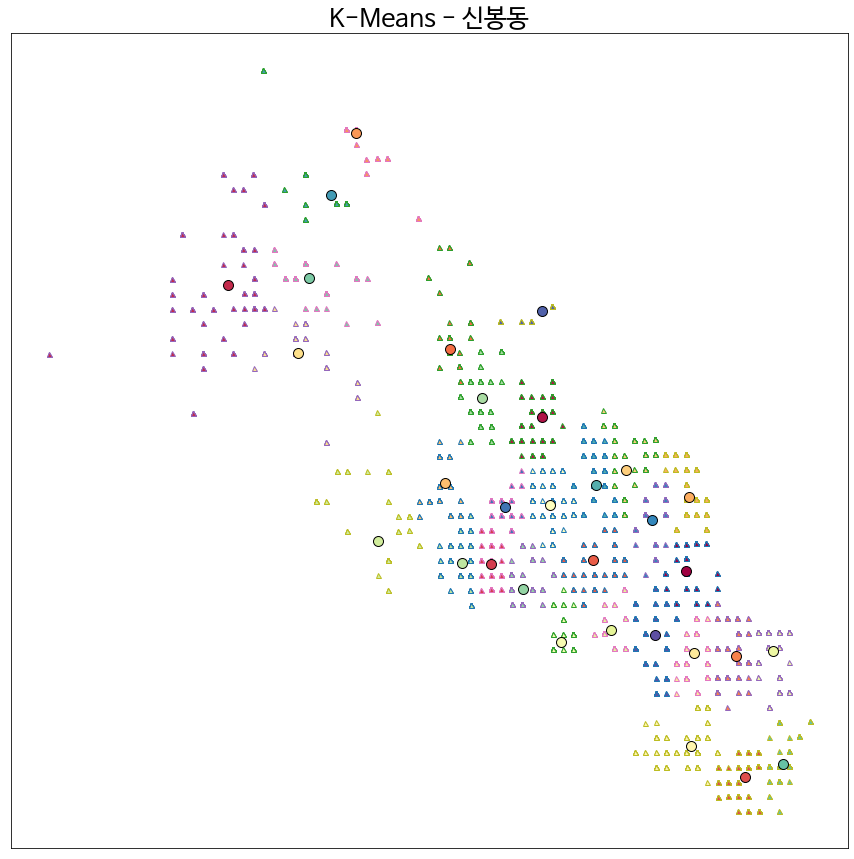

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_21_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(31), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_21_labels == k)

    # 중심 정의
    cluster_center = k_means_21_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[21][my_members, 0], all_data[21][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 신봉동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


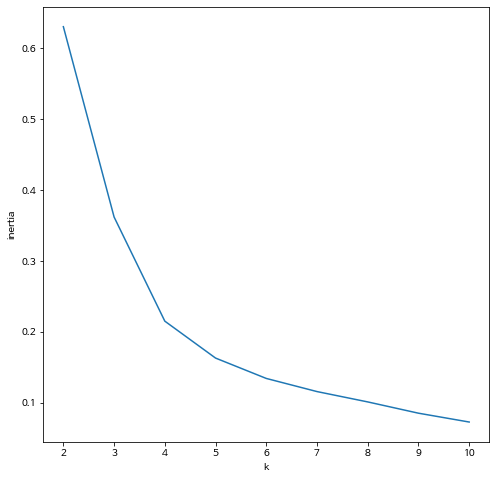

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[21])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4


##양지면

In [ ]:
k_means_22 = KMeans(init = "k-means++", n_clusters=19, n_init=12, random_state = 42)
k_means_22.fit(all_data[22])


KMeans(n_clusters=19, n_init=12, random_state=42)

In [ ]:
k_means_22_labels = k_means_22.labels_ 
print('k_means_22_labels : ', k_means_22_labels)

k_means_22_cluster_centers = k_means_22.cluster_centers_
print('k_means_22_cluster_centers : ', k_means_22_cluster_centers)


k_means_22_labels :  [ 4  4  4 ... 16  9  1]
k_means_22_cluster_centers :  [[127.25542716  37.24185806]
 [127.29406982  37.2286649 ]
 [127.32072144  37.24049029]
 [127.26821056  37.26459835]
 [127.28287454  37.2313597 ]
 [127.31132421  37.22976283]
 [127.25047069  37.26232416]
 [127.32842746  37.25485755]
 [127.26682142  37.24260027]
 [127.32028602  37.22140743]
 [127.28591754  37.23689747]
 [127.31275887  37.24000697]
 [127.30009999  37.24093455]
 [127.29128455  37.20446416]
 [127.2777682   37.22477337]
 [127.28101109  37.25619932]
 [127.29916397  37.22860828]
 [127.25824278  37.22412451]
 [127.24213322  37.25042365]]


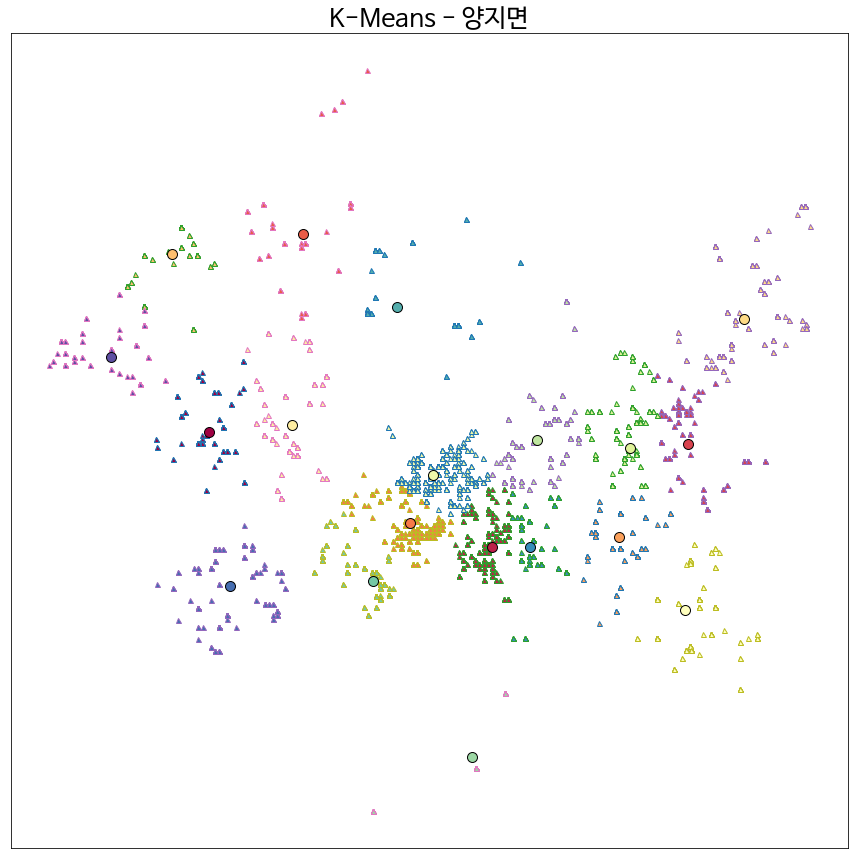

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_22_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(19), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_22_labels == k)

    # 중심 정의
    cluster_center = k_means_22_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[22][my_members, 0], all_data[22][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 양지면', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


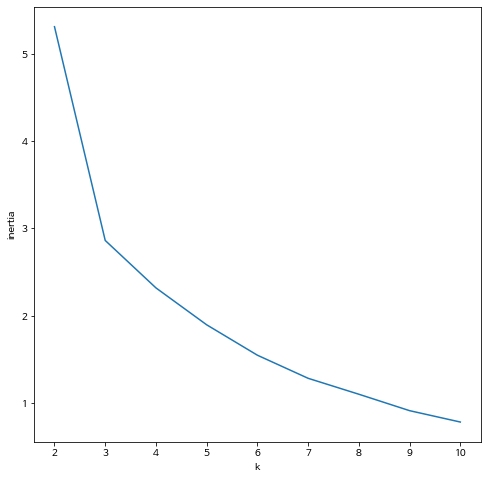

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[22])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


##역삼동

In [ ]:
k_means_23 = KMeans(init = "k-means++", n_clusters=25, n_init=12, random_state = 42)
k_means_23.fit(all_data[23])


KMeans(n_clusters=25, n_init=12, random_state=42)

In [ ]:
k_means_23_labels = k_means_23.labels_ 
print('k_means_23_labels : ', k_means_23_labels)

k_means_23_cluster_centers = k_means_23.cluster_centers_
print('k_means_23_cluster_centers : ', k_means_23_cluster_centers)


k_means_23_labels :  [19  4 15 ... 10  9 13]
k_means_23_cluster_centers :  [[127.17955065  37.23722065]
 [127.19513568  37.23702953]
 [127.16933842  37.23970922]
 [127.18741125  37.23845641]
 [127.18679783  37.23348948]
 [127.16796497  37.2275192 ]
 [127.16667646  37.25253387]
 [127.1893017   37.24520845]
 [127.16412465  37.24685231]
 [127.19634914  37.24255921]
 [127.19106833  37.23628946]
 [127.16534621  37.23979638]
 [127.19061631  37.24061516]
 [127.18312796  37.2305936 ]
 [127.18915019  37.23059243]
 [127.17329866  37.24085245]
 [127.15636944  37.23460324]
 [127.1787405   37.24142882]
 [127.19792874  37.23916823]
 [127.17220392  37.23838137]
 [127.19325235  37.23917954]
 [127.19002408  37.25151043]
 [127.18397672  37.24792016]
 [127.18589133  37.23536317]
 [127.16726096  37.24529966]]


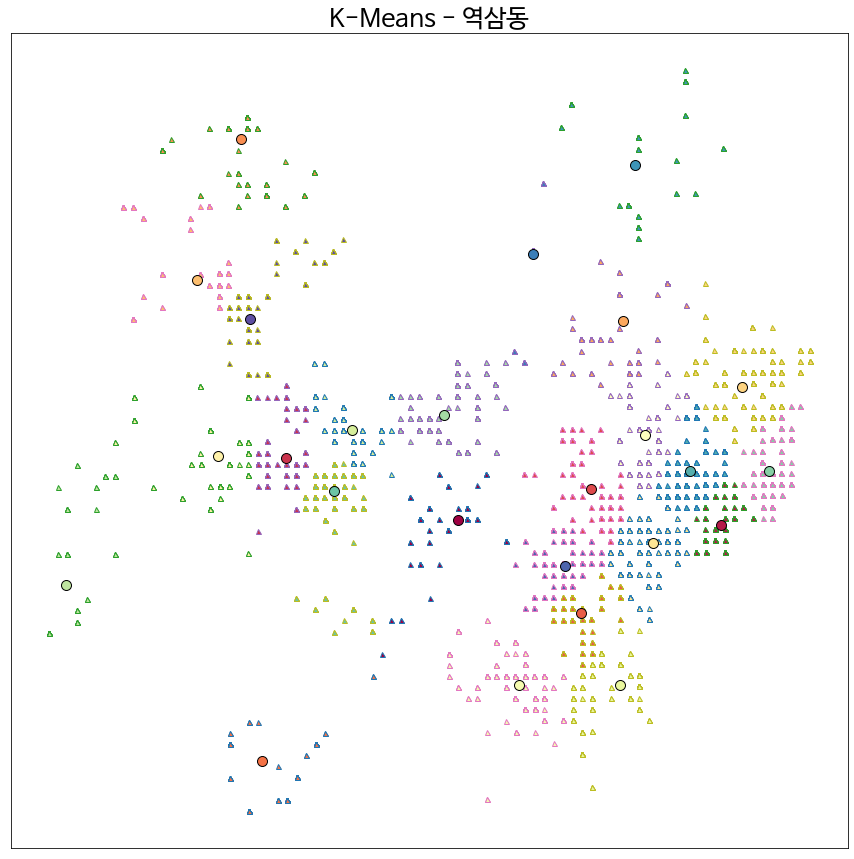

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_23_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(25), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_23_labels == k)

    # 중심 정의
    cluster_center = k_means_23_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[23][my_members, 0], all_data[23][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 역삼동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


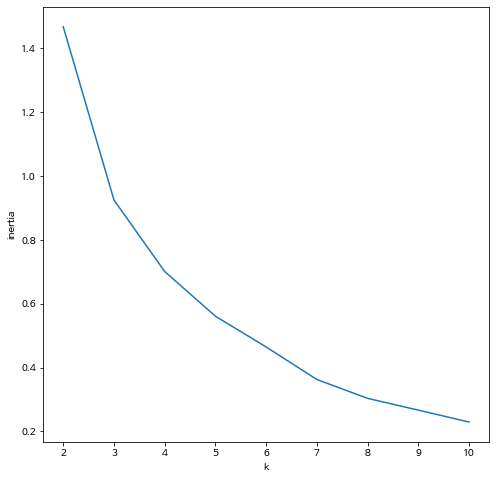

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[23])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


##영덕 1동

In [ ]:
k_means_24 = KMeans(init = "k-means++", n_clusters=15, n_init=12, random_state = 42)
k_means_24.fit(all_data[24])


KMeans(n_clusters=15, n_init=12, random_state=42)

In [ ]:
k_means_24_labels = k_means_24.labels_ 
print('k_means_24_labels : ', k_means_24_labels)

k_means_24_cluster_centers = k_means_24.cluster_centers_
print('k_means_24_cluster_centers : ', k_means_24_cluster_centers)


k_means_24_labels :  [ 2  2  6 ...  9 10  2]
k_means_24_cluster_centers :  [[127.07364778  37.27953064]
 [127.09151199  37.27398644]
 [127.07425884  37.27350512]
 [127.08713139  37.2744066 ]
 [127.0699788   37.27559091]
 [127.07562621  37.26398392]
 [127.08329843  37.27161831]
 [127.07285956  37.27633558]
 [127.09743822  37.27216853]
 [127.07522972  37.26795311]
 [127.08068053  37.27579696]
 [127.07682641  37.2772499 ]
 [127.06852065  37.27216128]
 [127.08457945  37.28408204]
 [127.07828565  37.28061096]]


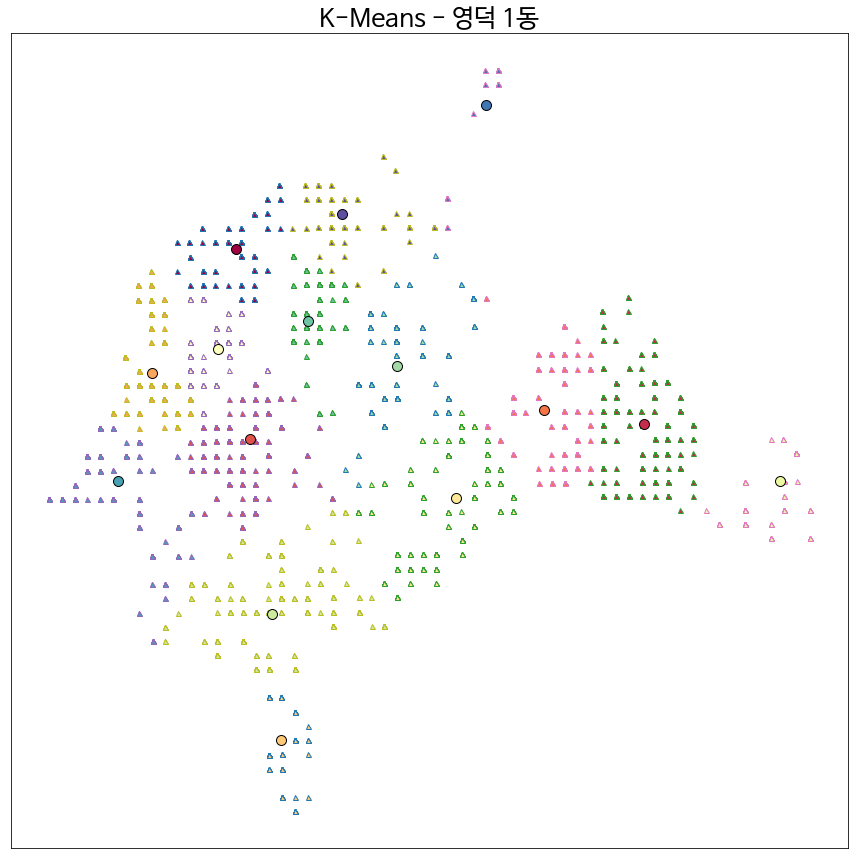

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_24_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(15), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_24_labels == k)

    # 중심 정의
    cluster_center = k_means_24_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[24][my_members, 0], all_data[24][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 영덕 1동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


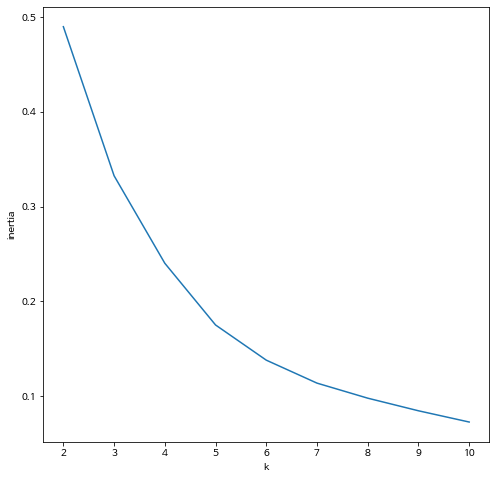

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[24])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


## 영덕 2동

In [ ]:
k_means_25 = KMeans(init = "k-means++", n_clusters=16, n_init=12, random_state = 42)
k_means_25.fit(all_data[25])


KMeans(n_clusters=16, n_init=12, random_state=42)

In [ ]:
k_means_25_labels = k_means_25.labels_ 
print('k_means_25_labels : ', k_means_25_labels)

k_means_25_cluster_centers = k_means_25.cluster_centers_
print('k_means_25_cluster_centers : ', k_means_25_cluster_centers)


k_means_25_labels :  [14  9  4 ...  2 10  2]
k_means_25_cluster_centers :  [[127.08916498  37.26388126]
 [127.09011657  37.24968661]
 [127.09561539  37.26867075]
 [127.10277346  37.24847871]
 [127.08947386  37.25503553]
 [127.09552703  37.25731973]
 [127.08412323  37.25388582]
 [127.09301005  37.26564676]
 [127.09014861  37.26909572]
 [127.08307542  37.24300274]
 [127.10073861  37.25360061]
 [127.09499391  37.26265513]
 [127.0999625   37.26796208]
 [127.08413727  37.25030015]
 [127.0973452   37.24788854]
 [127.09658572  37.26607909]]


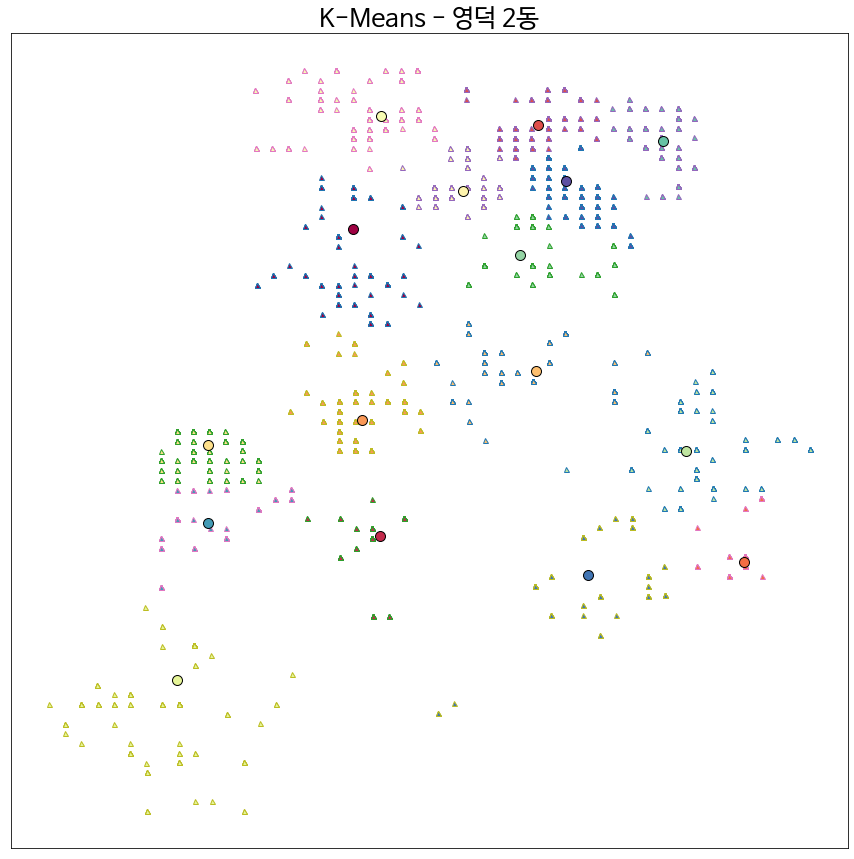

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_25_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(16), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_25_labels == k)

    # 중심 정의
    cluster_center = k_means_25_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[25][my_members, 0], all_data[25][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 영덕 2동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


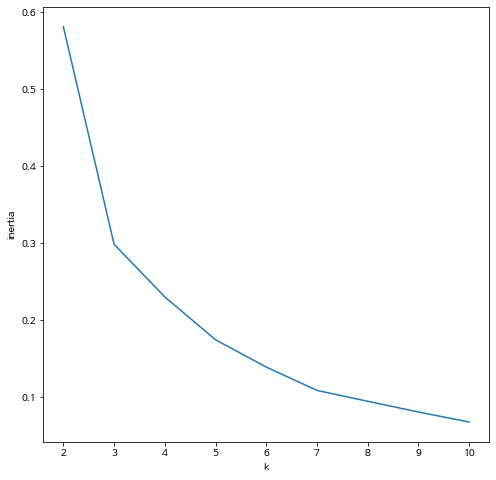

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[25])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


##원삼면

In [ ]:
k_means_26 = KMeans(init = "k-means++", n_clusters=15, n_init=12, random_state = 42)
k_means_26.fit(all_data[26])


KMeans(n_clusters=15, n_init=12, random_state=42)

In [ ]:
k_means_26_labels = k_means_26.labels_ 
print('k_means_26_labels : ', k_means_26_labels)

k_means_26_cluster_centers = k_means_26.cluster_centers_
print('k_means_26_cluster_centers : ', k_means_26_cluster_centers)


k_means_26_labels :  [ 8 10 12 ...  7  4  5]
k_means_26_cluster_centers :  [[127.31288491  37.16595202]
 [127.32758929  37.19306866]
 [127.31041637  37.13864226]
 [127.32270337  37.19984643]
 [127.33785082  37.15288212]
 [127.31379717  37.19242548]
 [127.28532683  37.1482934 ]
 [127.3202992   37.21132833]
 [127.33463713  37.18481135]
 [127.30289511  37.15189442]
 [127.30102706  37.1736964 ]
 [127.3219303   37.1724203 ]
 [127.32729425  37.13690492]
 [127.30876468  37.11326413]
 [127.33862236  37.20820968]]


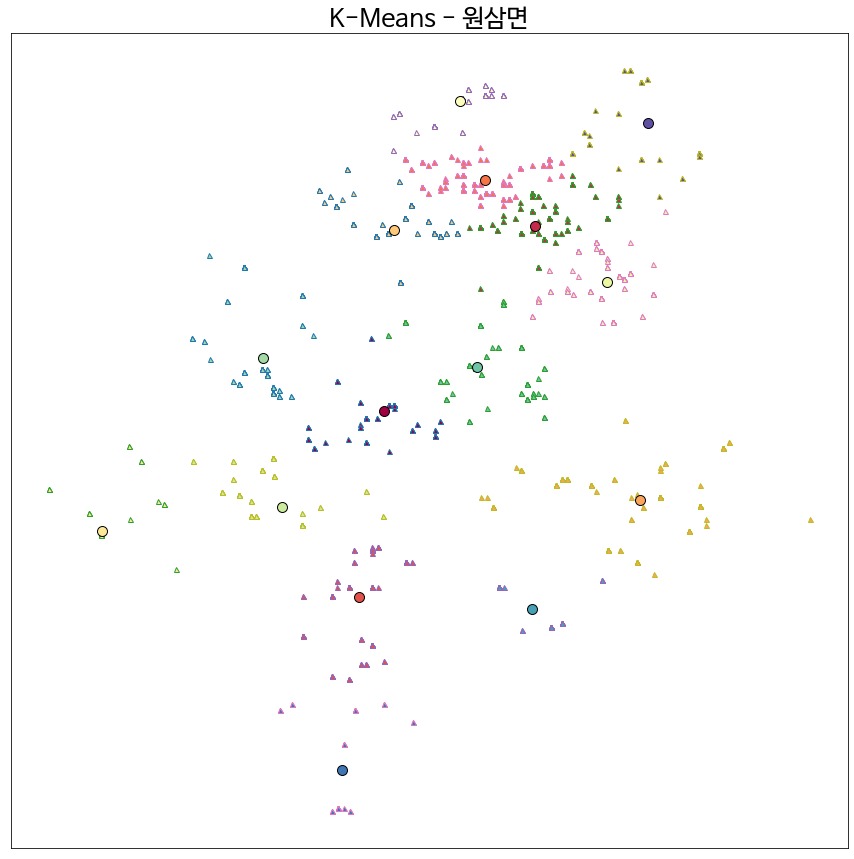

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_26_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(15), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_26_labels == k)

    # 중심 정의
    cluster_center = k_means_26_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[26][my_members, 0], all_data[26][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 원삼면', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


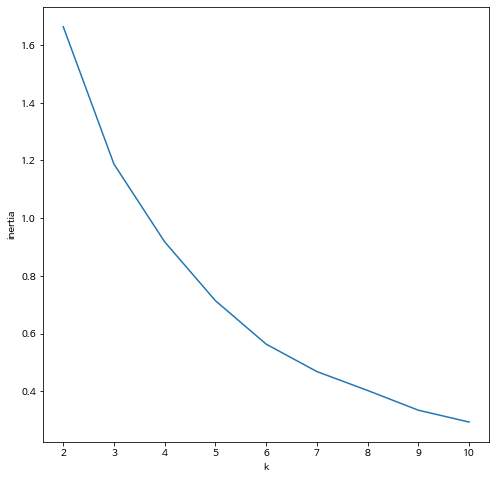

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[26])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3

##유림동

In [ ]:
k_means_27 = KMeans(init = "k-means++", n_clusters=18, n_init=12, random_state = 42)
k_means_27.fit(all_data[27])


KMeans(n_clusters=18, n_init=12, random_state=42)

In [ ]:
k_means_27_labels = k_means_27.labels_ 
print('k_means_27_labels : ', k_means_27_labels)

k_means_27_cluster_centers = k_means_27.cluster_centers_
print('k_means_27_cluster_centers : ', k_means_27_cluster_centers)

k_means_27_labels :  [ 3 11 10 ...  8 17  3]
k_means_27_cluster_centers :  [[127.2238006   37.26506031]
 [127.21431211  37.24179174]
 [127.18728992  37.26116814]
 [127.23022825  37.24598443]
 [127.21149625  37.26278499]
 [127.2226653   37.25161057]
 [127.23615471  37.25827188]
 [127.19798726  37.25968684]
 [127.21673532  37.26356367]
 [127.21411306  37.2583639 ]
 [127.21815369  37.23800554]
 [127.21958275  37.24601769]
 [127.22756072  37.25309735]
 [127.21369248  37.2489582 ]
 [127.2370984   37.24731783]
 [127.20563759  37.26701982]
 [127.22232019  37.25945954]
 [127.20815234  37.25583315]]


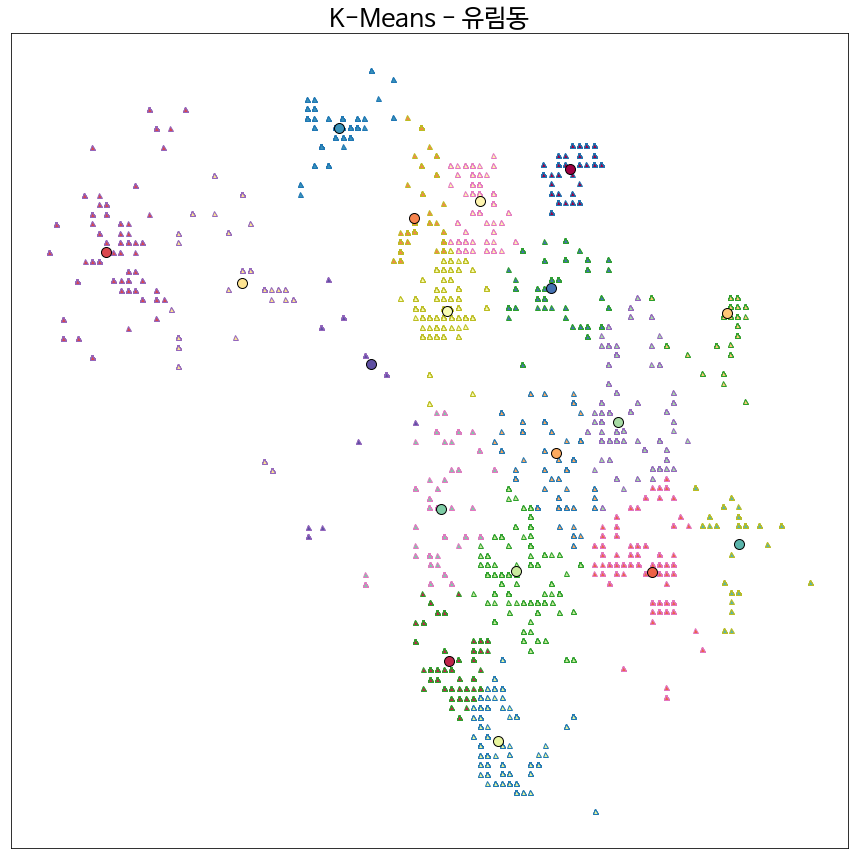

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_27_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(18), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_27_labels == k)

    # 중심 정의
    cluster_center = k_means_27_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[27][my_members, 0], all_data[27][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 유림동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


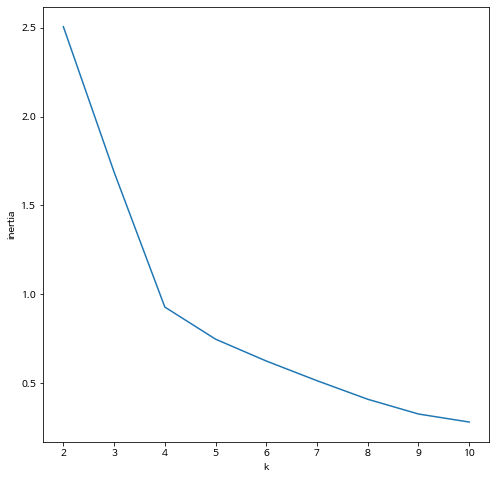

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[27])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4


##이동읍

In [ ]:
k_means_28 = KMeans(init = "k-means++", n_clusters=15, n_init=12, random_state = 42)
k_means_28.fit(all_data[28])


KMeans(n_clusters=15, n_init=12, random_state=42)

In [ ]:
k_means_28_labels = k_means_28.labels_ 
print('k_means_28_labels : ', k_means_28_labels)

k_means_28_cluster_centers = k_means_28.cluster_centers_
print('k_means_28_cluster_centers : ', k_means_28_cluster_centers)


k_means_28_labels :  [14 12  3 ...  5 12 10]
k_means_28_cluster_centers :  [[127.20978289  37.20247029]
 [127.22208229  37.13230512]
 [127.21020386  37.16845037]
 [127.19963227  37.13869644]
 [127.20846571  37.17549343]
 [127.18483597  37.19991111]
 [127.25046007  37.1761093 ]
 [127.18473977  37.10268816]
 [127.22824011  37.17265156]
 [127.22954594  37.19410711]
 [127.1812117   37.18872265]
 [127.16829658  37.21697737]
 [127.20739451  37.19184447]
 [127.21351053  37.14895168]
 [127.21548604  37.11490885]]


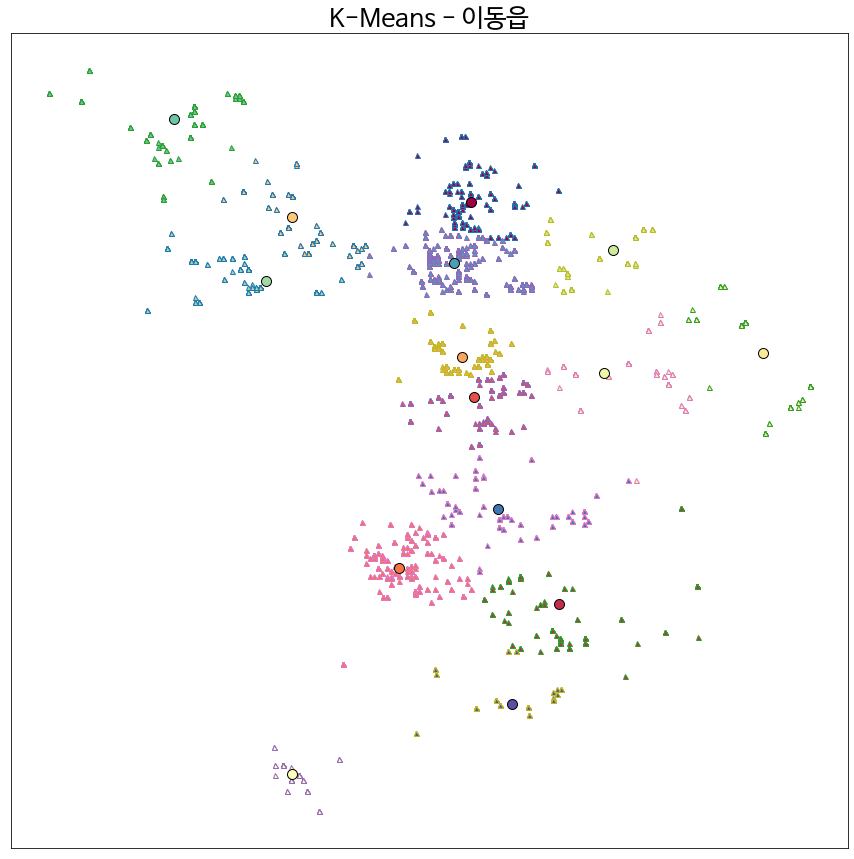

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_28_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(15), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_28_labels == k)

    # 중심 정의
    cluster_center = k_means_28_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[28][my_members, 0], all_data[28][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 이동읍', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


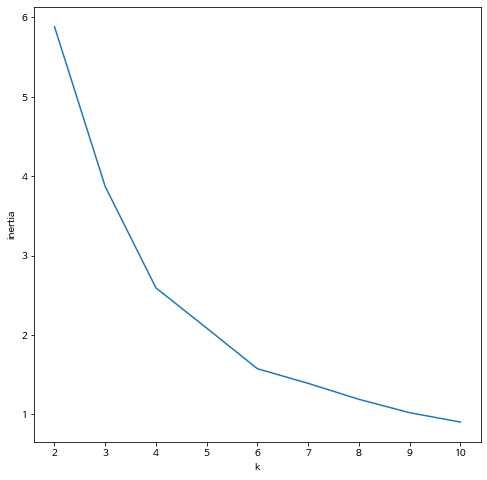

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[28])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 6


##죽전 1동

In [ ]:
k_means_29 = KMeans(init = "k-means++", n_clusters=24, n_init=12, random_state = 42)
k_means_29.fit(all_data[29])


KMeans(n_clusters=24, n_init=12, random_state=42)

In [ ]:
k_means_29_labels = k_means_29.labels_ 
print('k_means_29_labels : ', k_means_29_labels)

k_means_29_cluster_centers = k_means_29.cluster_centers_
print('k_means_29_cluster_centers : ', k_means_29_cluster_centers)


k_means_29_labels :  [ 3  6 18 ...  0 17  2]
k_means_29_cluster_centers :  [[127.112322    37.3275918 ]
 [127.12572853  37.33043102]
 [127.13743661  37.3325741 ]
 [127.12001744  37.32343377]
 [127.11552424  37.32381042]
 [127.12315979  37.33566164]
 [127.12907592  37.33141982]
 [127.11702533  37.32869639]
 [127.12901636  37.32199947]
 [127.1147002   37.33246425]
 [127.12384602  37.32845303]
 [127.11340806  37.32501541]
 [127.13323024  37.33066862]
 [127.11955251  37.33127434]
 [127.12642371  37.33473775]
 [127.11436425  37.32914168]
 [127.12624566  37.32063536]
 [127.12207648  37.33342347]
 [127.11727839  37.32247431]
 [127.11907391  37.325603  ]
 [127.13015899  37.32770672]
 [127.12203328  37.32678843]
 [127.12372862  37.32451066]
 [127.13113794  37.33333647]]


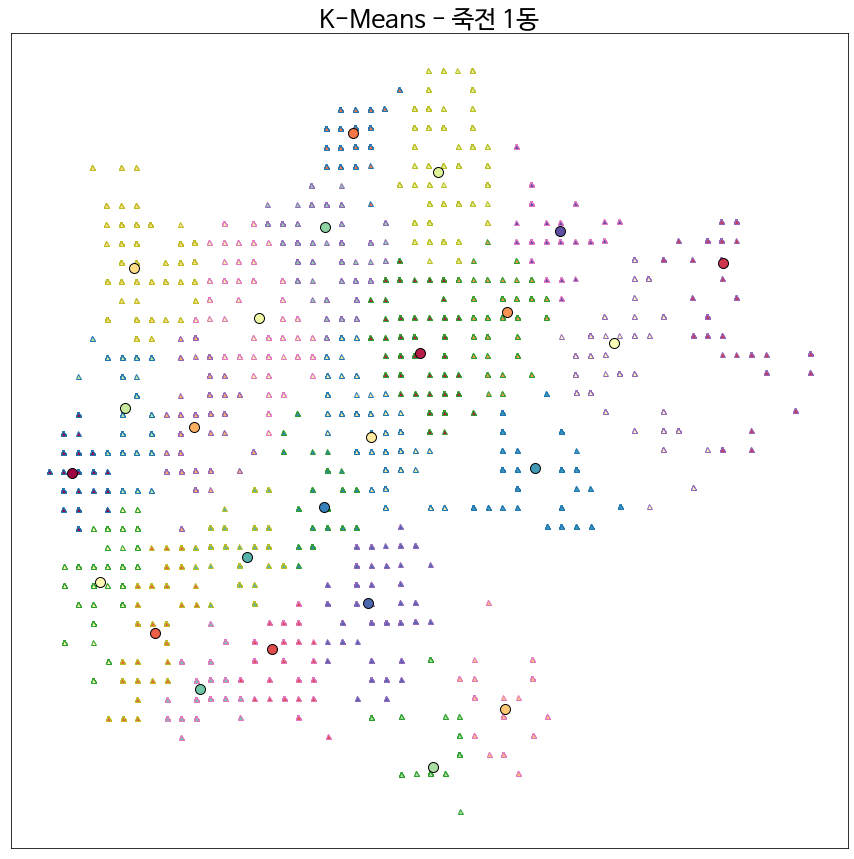

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_29_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(24), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_29_labels == k)

    # 중심 정의
    cluster_center = k_means_29_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[29][my_members, 0], all_data[29][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 죽전 1동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


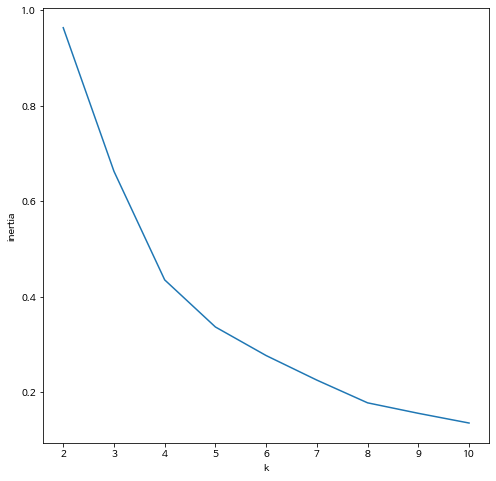

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[29])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 4

## 죽전 2동

In [ ]:
k_means_30 = KMeans(init = "k-means++", n_clusters=17, n_init=12, random_state = 42)
k_means_30.fit(all_data[30])


KMeans(n_clusters=17, n_init=12, random_state=42)

In [ ]:
k_means_30_labels = k_means_30.labels_ 
print('k_means_30_labels : ', k_means_30_labels)

k_means_30_cluster_centers = k_means_30.cluster_centers_
print('k_means_30_cluster_centers : ', k_means_30_cluster_centers)


k_means_30_labels :  [ 3  7 16 ...  2 12  3]
k_means_30_cluster_centers :  [[127.10296384  37.33147225]
 [127.11073951  37.3304071 ]
 [127.10521175  37.33472857]
 [127.10806177  37.32524694]
 [127.10999697  37.33183855]
 [127.1046411   37.32944279]
 [127.11001944  37.32874875]
 [127.11165933  37.33414282]
 [127.1071428   37.3351463 ]
 [127.10572512  37.33659545]
 [127.10553178  37.32626131]
 [127.10328211  37.33789661]
 [127.10542623  37.3317798 ]
 [127.11038673  37.32609573]
 [127.1121623   37.3320262 ]
 [127.1035456   37.3263036 ]
 [127.1092452   37.33381664]]


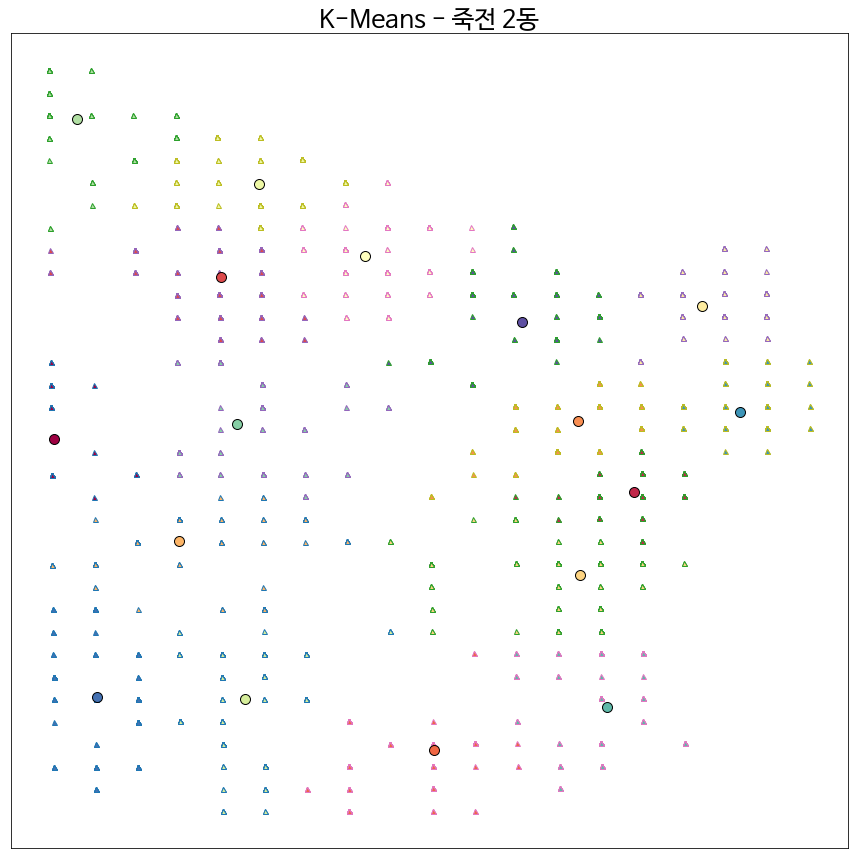

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_30_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(17), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_30_labels == k)

    # 중심 정의
    cluster_center = k_means_30_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[30][my_members, 0], all_data[30][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 죽전 2동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


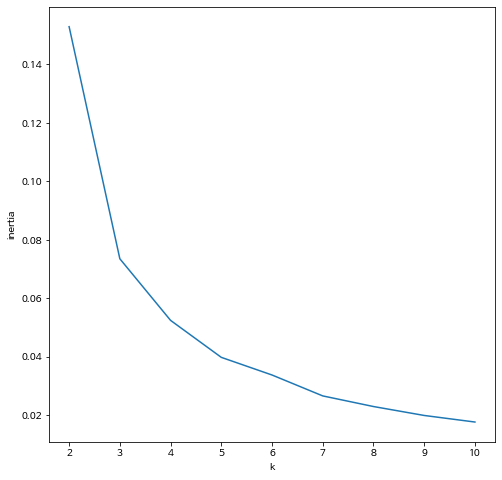

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[30])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


## 중앙동

In [ ]:
k_means_31 = KMeans(init = "k-means++", n_clusters=18, n_init=12, random_state = 42)
k_means_31.fit(all_data[31])


KMeans(n_clusters=18, n_init=12, random_state=42)

In [ ]:
k_means_31_labels = k_means_31.labels_ 
print('k_means_31_labels : ', k_means_31_labels)

k_means_31_cluster_centers = k_means_31.cluster_centers_
print('k_means_31_cluster_centers : ', k_means_31_cluster_centers)


k_means_31_labels :  [14 10 14 ... 14 16  2]
k_means_31_cluster_centers :  [[127.19427112  37.23401452]
 [127.20725155  37.23407181]
 [127.18788612  37.22284725]
 [127.20823508  37.22088449]
 [127.20207931  37.23275751]
 [127.17961524  37.22397728]
 [127.20165415  37.23905709]
 [127.20566836  37.24004852]
 [127.19730731  37.23438356]
 [127.21954576  37.21573075]
 [127.19919715  37.23195182]
 [127.21141516  37.23069457]
 [127.21027407  37.21614174]
 [127.1981265   37.22638598]
 [127.20007608  37.23528577]
 [127.19090513  37.2274163 ]
 [127.20828719  37.23859557]
 [127.20824877  37.22839173]]


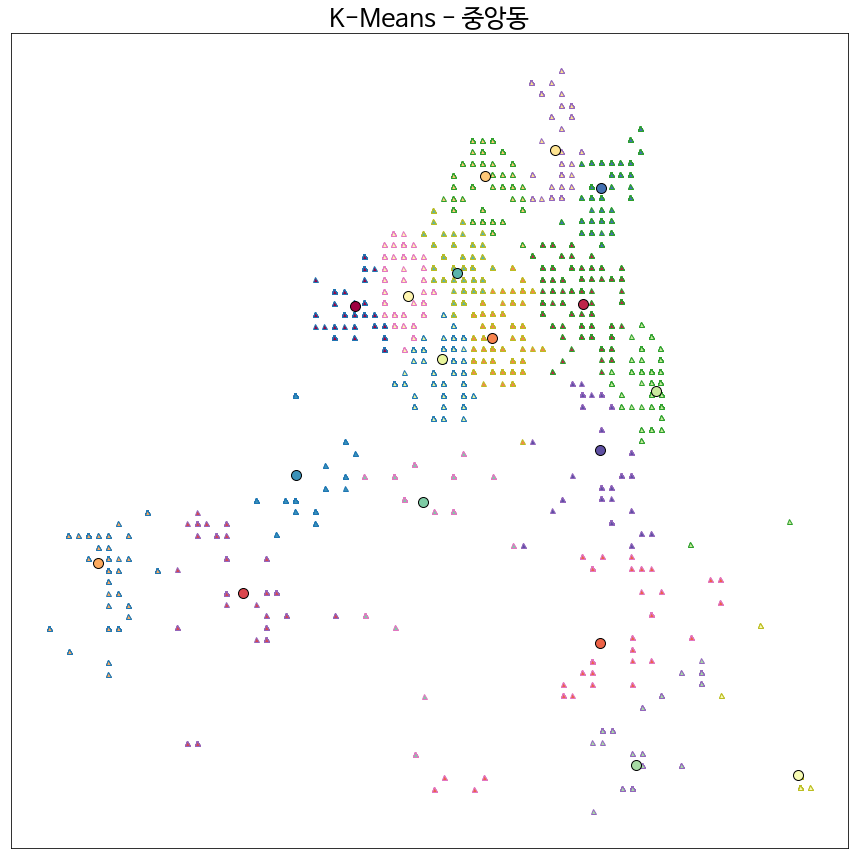

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_31_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(18), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_31_labels == k)

    # 중심 정의
    cluster_center = k_means_31_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[31][my_members, 0], all_data[31][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 중앙동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


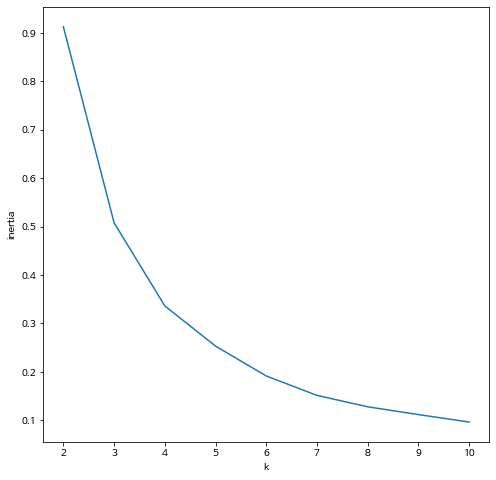

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[31])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


##포곡읍

In [ ]:
k_means_32 = KMeans(init = "k-means++", n_clusters=25, n_init=12, random_state = 42)
k_means_32.fit(all_data[32])


KMeans(n_clusters=25, n_init=12, random_state=42)

In [ ]:
k_means_32_labels = k_means_32.labels_ 
print('k_means_32_labels : ', k_means_32_labels)

k_means_32_cluster_centers = k_means_32.cluster_centers_
print('k_means_32_cluster_centers : ', k_means_32_cluster_centers)


k_means_32_labels :  [ 4  9 13 ... 23  7  0]
k_means_32_cluster_centers :  [[127.22710372  37.26663009]
 [127.23566235  37.28863443]
 [127.20943477  37.28404383]
 [127.18971423  37.28057623]
 [127.21726893  37.2722268 ]
 [127.22474652  37.30428883]
 [127.1990889   37.2762861 ]
 [127.20196345  37.29627162]
 [127.22466399  37.28603853]
 [127.21208     37.27089311]
 [127.23323782  37.28192994]
 [127.22125108  37.2809356 ]
 [127.20205868  37.2689421 ]
 [127.23630107  37.26591339]
 [127.23661073  37.29769838]
 [127.24122544  37.2905039 ]
 [127.21669061  37.26791188]
 [127.21835893  37.3116074 ]
 [127.22590336  37.29350451]
 [127.25313825  37.28356805]
 [127.22199211  37.27036542]
 [127.22868973  37.27493325]
 [127.19651476  37.29128073]
 [127.21612153  37.28599809]
 [127.24297511  37.27336545]]


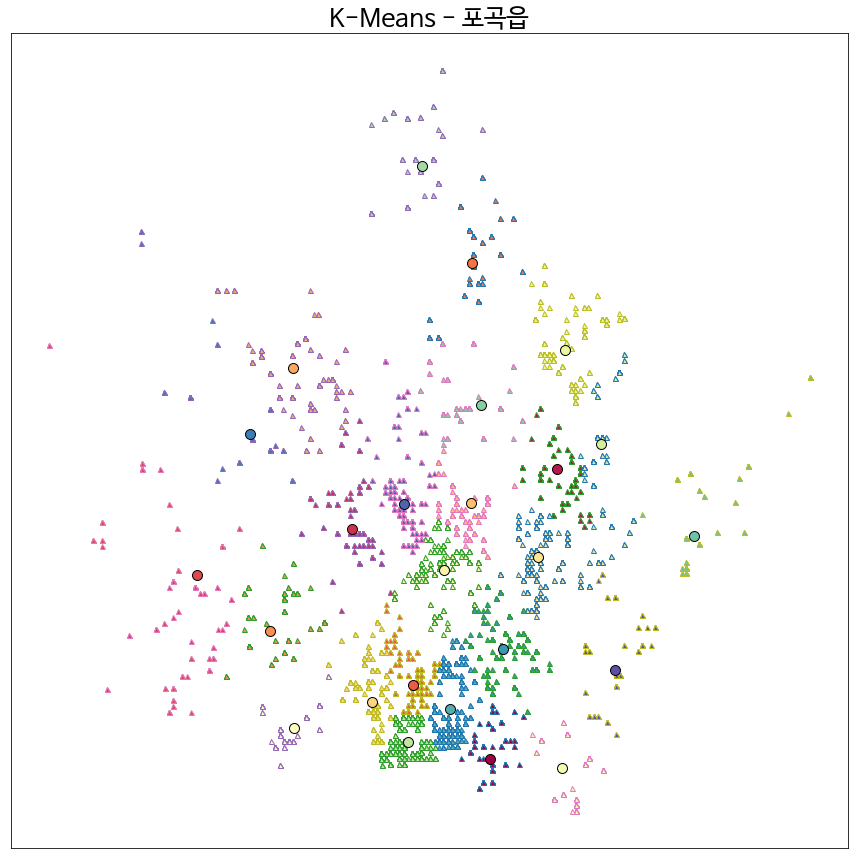

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_32_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(25), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_32_labels == k)

    # 중심 정의
    cluster_center = k_means_32_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[32][my_members, 0], all_data[32][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 포곡읍', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


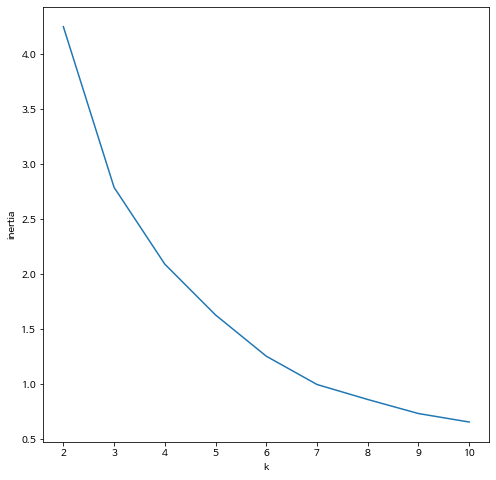

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[32])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 3


##풍덕천 1동

In [ ]:
k_means_33 = KMeans(init = "k-means++", n_clusters=28, n_init=12, random_state = 42)
k_means_33.fit(all_data[33])


KMeans(n_clusters=28, n_init=12, random_state=42)

In [ ]:
k_means_33_labels = k_means_33.labels_ 
print('k_means_33_labels : ', k_means_33_labels)

k_means_33_cluster_centers = k_means_33.cluster_centers_
print('k_means_33_cluster_centers : ', k_means_33_cluster_centers)


k_means_33_labels :  [ 2 26 11 ...  1  4 11]
k_means_33_cluster_centers :  [[127.08873428  37.32974267]
 [127.09777996  37.32595709]
 [127.10117035  37.33165409]
 [127.09383687  37.33084182]
 [127.09079897  37.32646434]
 [127.10029701  37.32358813]
 [127.10018303  37.32787284]
 [127.09657632  37.32378102]
 [127.09283121  37.32490891]
 [127.09684706  37.33195729]
 [127.09465342  37.3264039 ]
 [127.08854312  37.32640782]
 [127.09978245  37.32951143]
 [127.09304653  37.32832383]
 [127.09111164  37.32860967]
 [127.08582097  37.33016705]
 [127.08635179  37.32690501]
 [127.09940518  37.33201798]
 [127.10021357  37.32559473]
 [127.10199582  37.32740047]
 [127.09790957  37.32209038]
 [127.10174218  37.32408274]
 [127.09412428  37.32389781]
 [127.09596629  37.33168476]
 [127.0968124   37.33014591]
 [127.09863416  37.32773882]
 [127.09539137  37.32871518]
 [127.10178576  37.33066043]]


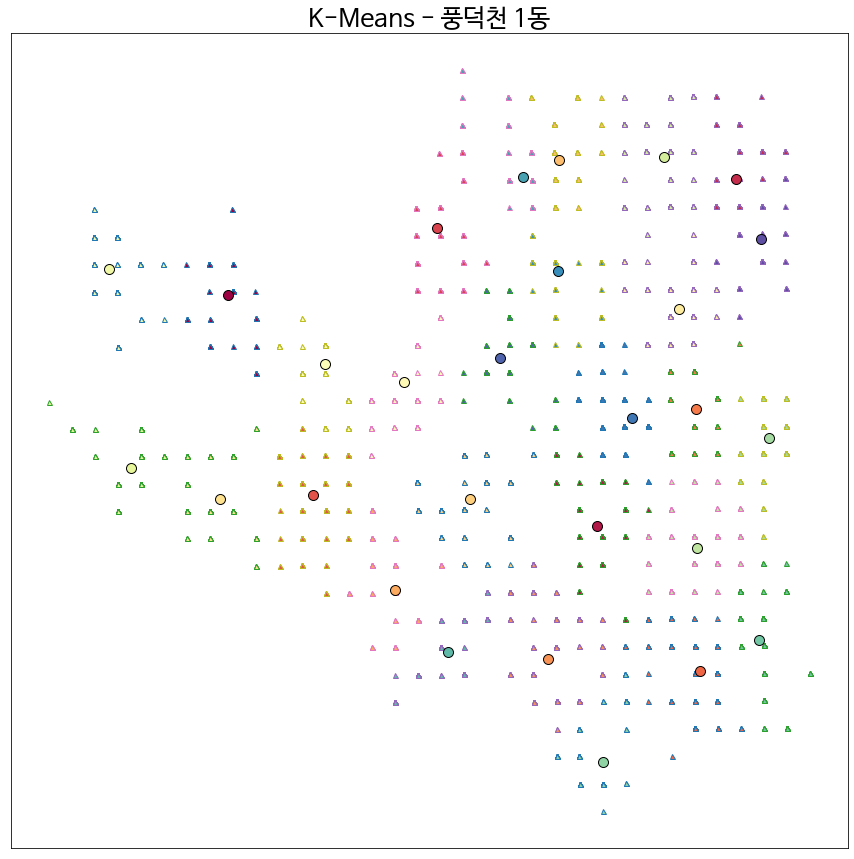

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_33_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(28), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_33_labels == k)

    # 중심 정의
    cluster_center = k_means_33_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[33][my_members, 0], all_data[33][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 풍덕천 1동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


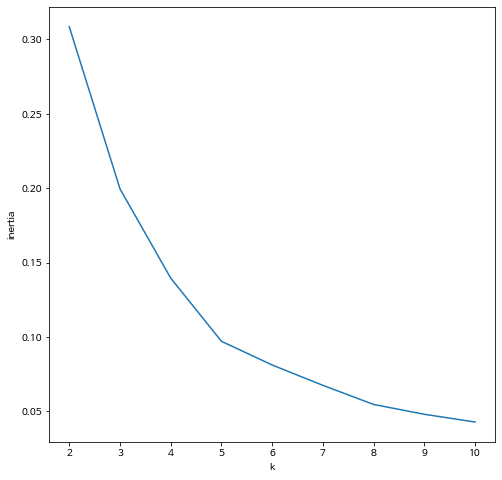

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[33])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 5


## 풍덕천 2동

In [ ]:
k_means_34 = KMeans(init = "k-means++", n_clusters=17, n_init=12, random_state = 42)
k_means_34.fit(all_data[34])


KMeans(n_clusters=17, n_init=12, random_state=42)

In [ ]:
k_means_34_labels = k_means_34.labels_ 
print('k_means_34_labels : ', k_means_34_labels)

k_means_34_cluster_centers = k_means_34.cluster_centers_
print('k_means_34_cluster_centers : ', k_means_34_cluster_centers)


k_means_34_labels :  [ 0  4 11 ...  7  1  4]
k_means_34_cluster_centers :  [[127.08308338  37.31529038]
 [127.09010091  37.31812361]
 [127.09783919  37.31499503]
 [127.08373146  37.32644958]
 [127.0937907   37.32200569]
 [127.08680553  37.32189311]
 [127.08681304  37.31646742]
 [127.09124117  37.32192654]
 [127.09312366  37.31608936]
 [127.08488     37.331154  ]
 [127.09656075  37.3172323 ]
 [127.08595626  37.31939365]
 [127.09168351  37.31963236]
 [127.0988071   37.3184141 ]
 [127.0850426   37.31540065]
 [127.08970656  37.32313295]
 [127.09589283  37.32082267]]


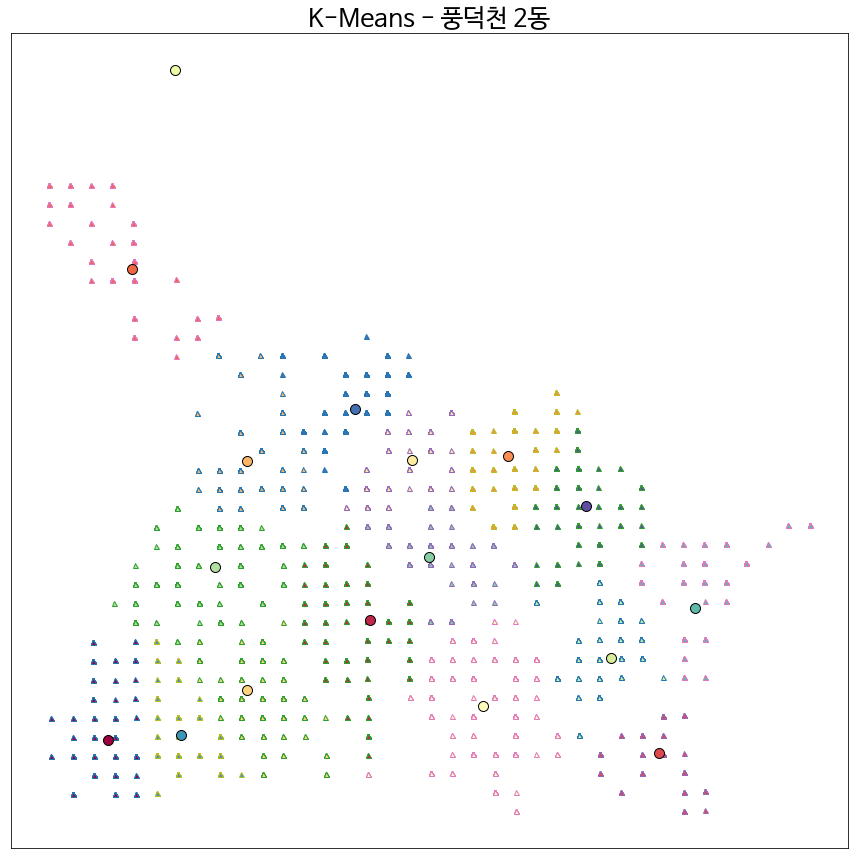

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(15, 15))  # 이 부분은 그래프의 사이즈라 숫자 건드릴 필요X 

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_34_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(17), colors):   # range()에 들어갈 숫자가 위에서 나온 n_clusters의 숫자
    my_members = (k_means_34_labels == k)

    # 중심 정의
    cluster_center = k_means_34_cluster_centers[k]

    # 중심 그리기
    ax.plot(all_data[34][my_members, 0], all_data[34][my_members, 1], '^', markerfacecolor=col, marker='^', markersize=5)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    plt.rcParams['font.family'] ='NanumBarunGothic'

ax.set_title('K-Means - 풍덕천 2동', fontsize=25)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


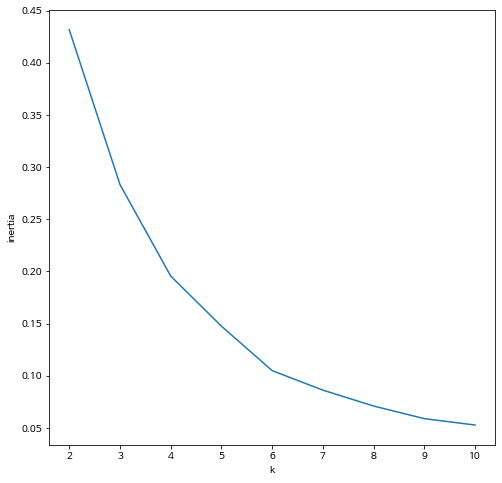

In [ ]:
plt.figure(figsize=(8, 8))
inertia = []
for k in range(2, 11):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(all_data[34])
  inertia.append(km.inertia_)
plt.plot(range(2, 11), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 최적의 k 값 : 6
